# %% [markdown]

## Embedding Similarity Analysis

 This notebook analyzes similarities between the embeddings of the moral dilemma dataset in both Portuguese, German, Spanish, and French in three main ways:
 1. **Scenario-wise analysis**: Compare different actors' responses to the same scenario (moral dilemma)
 2. **Actor-wise analysis**: Compare a same actor's responses to different scenarios
 3. **Reason-wise analysis**: Compare different reasoning versions for a same actor in the same scenario

 The actors considered for this analysis are:
 - **LLM Models**: GPT-3.5, GPT-4, Claude Haiku, Gemini 2, Gemma 7B, Mistral 7B, and Llama 2.
 - **Human Redditors**: The author of the top comment of each scenario submission.

In [ ]:
# %% Import libraries

import pandas as pd
from embedding_utils import (
    load_embeddings,
    load_or_compute_similarities,
    identify_actors_and_reasons,
    plot_row_similarity_comparison,
    compute_global_similarity_bounds,
    compute_global_column_similarity_bounds,
    compute_global_reason_similarity_bounds,
    summarize_row_characteristics,
    save_analysis_results,
    display_edge_llm_human_similarities,
    analyze_column_similarities,
    plot_column_similarity_comparison,
    summarize_column_characteristics,
    display_edge_scenario_similarities,
    plot_reason_similarity_comparison,
    summarize_reason_characteristics,
    cross_analyze_actor_similarity,
    cross_analyze_multiple_languages,
)

In [ ]:
# %% Load and explore the embeddings data

embeddings_dict_base = load_embeddings("../data/embeddings.csv")
embeddings_dict_br = load_embeddings("../data/embeddings_br.csv")
embeddings_dict_de = load_embeddings("../data/embeddings_de.csv")
embeddings_dict_es = load_embeddings("../data/embeddings_es.csv")
embeddings_dict_fr = load_embeddings("../data/embeddings_fr.csv")

In [ ]:
# %% Identify actors and reason types

actors_base, reason_types_base = identify_actors_and_reasons(embeddings_dict_base)
actors_br, reason_types_br = identify_actors_and_reasons(embeddings_dict_br)
actors_de, reason_types_de = identify_actors_and_reasons(embeddings_dict_de)
actors_es, reason_types_es = identify_actors_and_reasons(embeddings_dict_es)
actors_fr, reason_types_fr = identify_actors_and_reasons(embeddings_dict_fr)

# %% [markdown]

 ## 1. Scenario-wise Analysis

 This analysis compares how human redditors and LLM models respond to the same moral dilemma.
 For each scenario (row), embedding similarities are calculated between all pairs of actors.

In [ ]:
# %% Scenario-wise similarity analysis

row_similarities_base = load_or_compute_similarities(
    "base", embeddings_dict_base, actors_base, reason_types_base, "row"
)
row_similarities_br = load_or_compute_similarities(
    "br", embeddings_dict_br, actors_br, reason_types_br, "row"
)
row_similarities_de = load_or_compute_similarities(
    "de", embeddings_dict_de, actors_de, reason_types_de, "row"
)
row_similarities_es = load_or_compute_similarities(
    "es", embeddings_dict_es, actors_es, reason_types_es, "row"
)
row_similarities_fr = load_or_compute_similarities(
    "fr", embeddings_dict_fr, actors_fr, reason_types_fr, "row"
)

In [ ]:
# %% Compute global bounds for standardized plotting

all_row_similarities = {
    "Base": row_similarities_base,
    "Portuguese": row_similarities_br,
    "German": row_similarities_de,
    "Spanish": row_similarities_es,
    "French": row_similarities_fr,
}
global_bounds = compute_global_similarity_bounds(all_row_similarities)

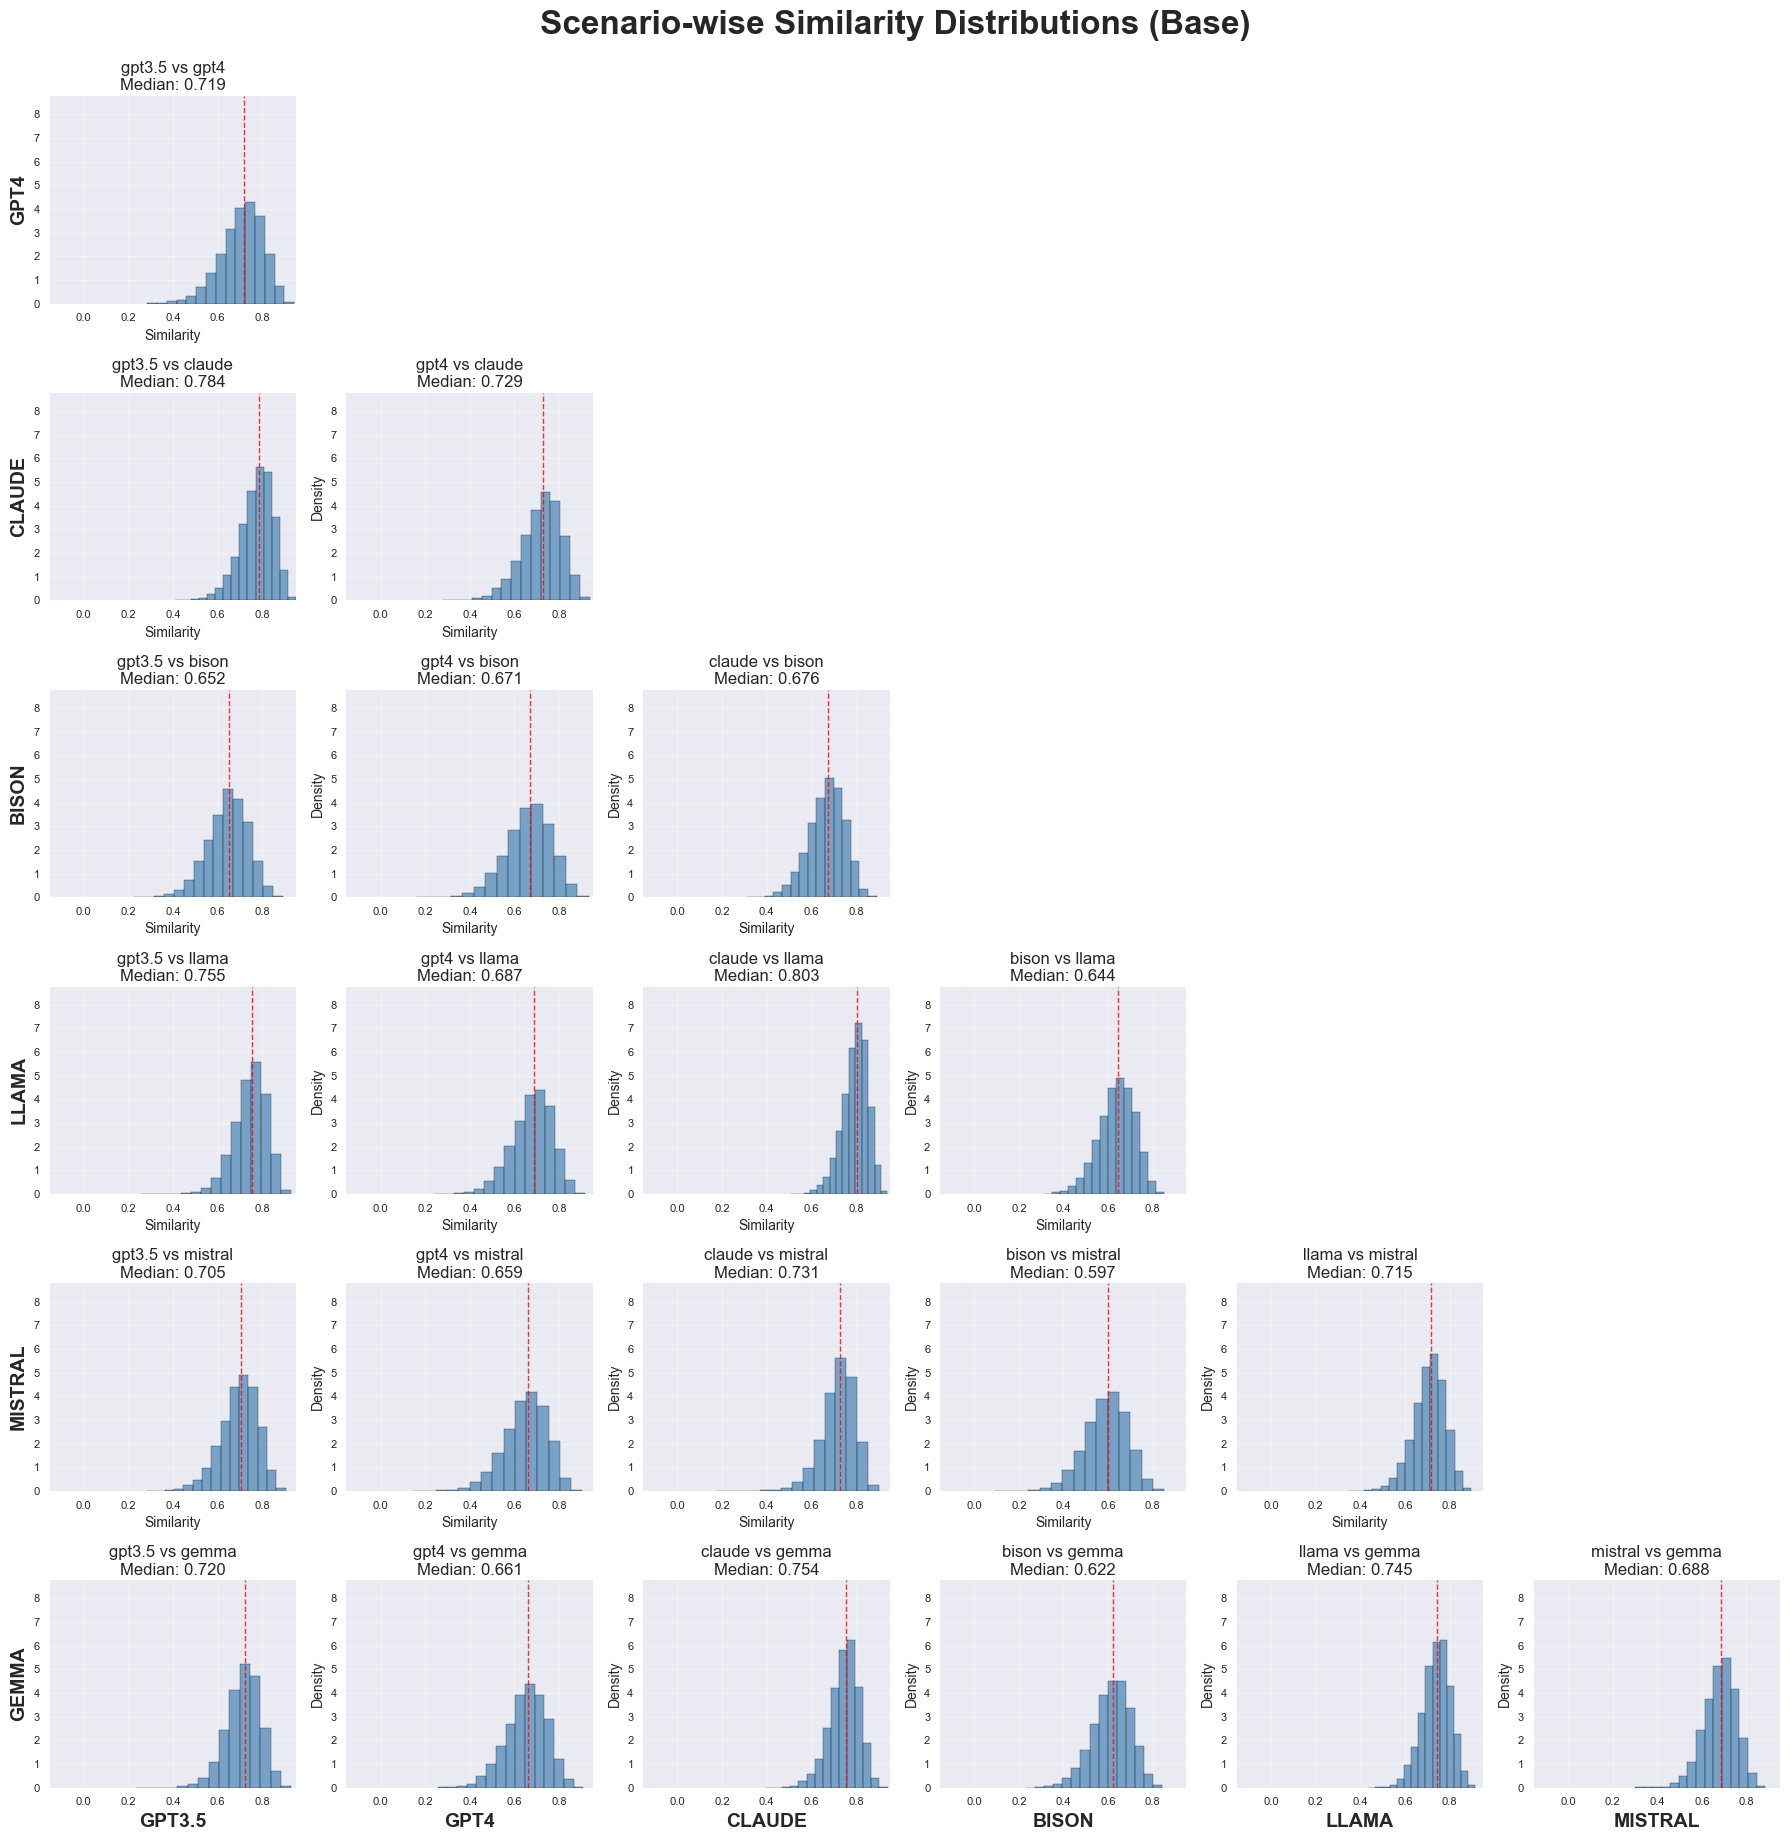

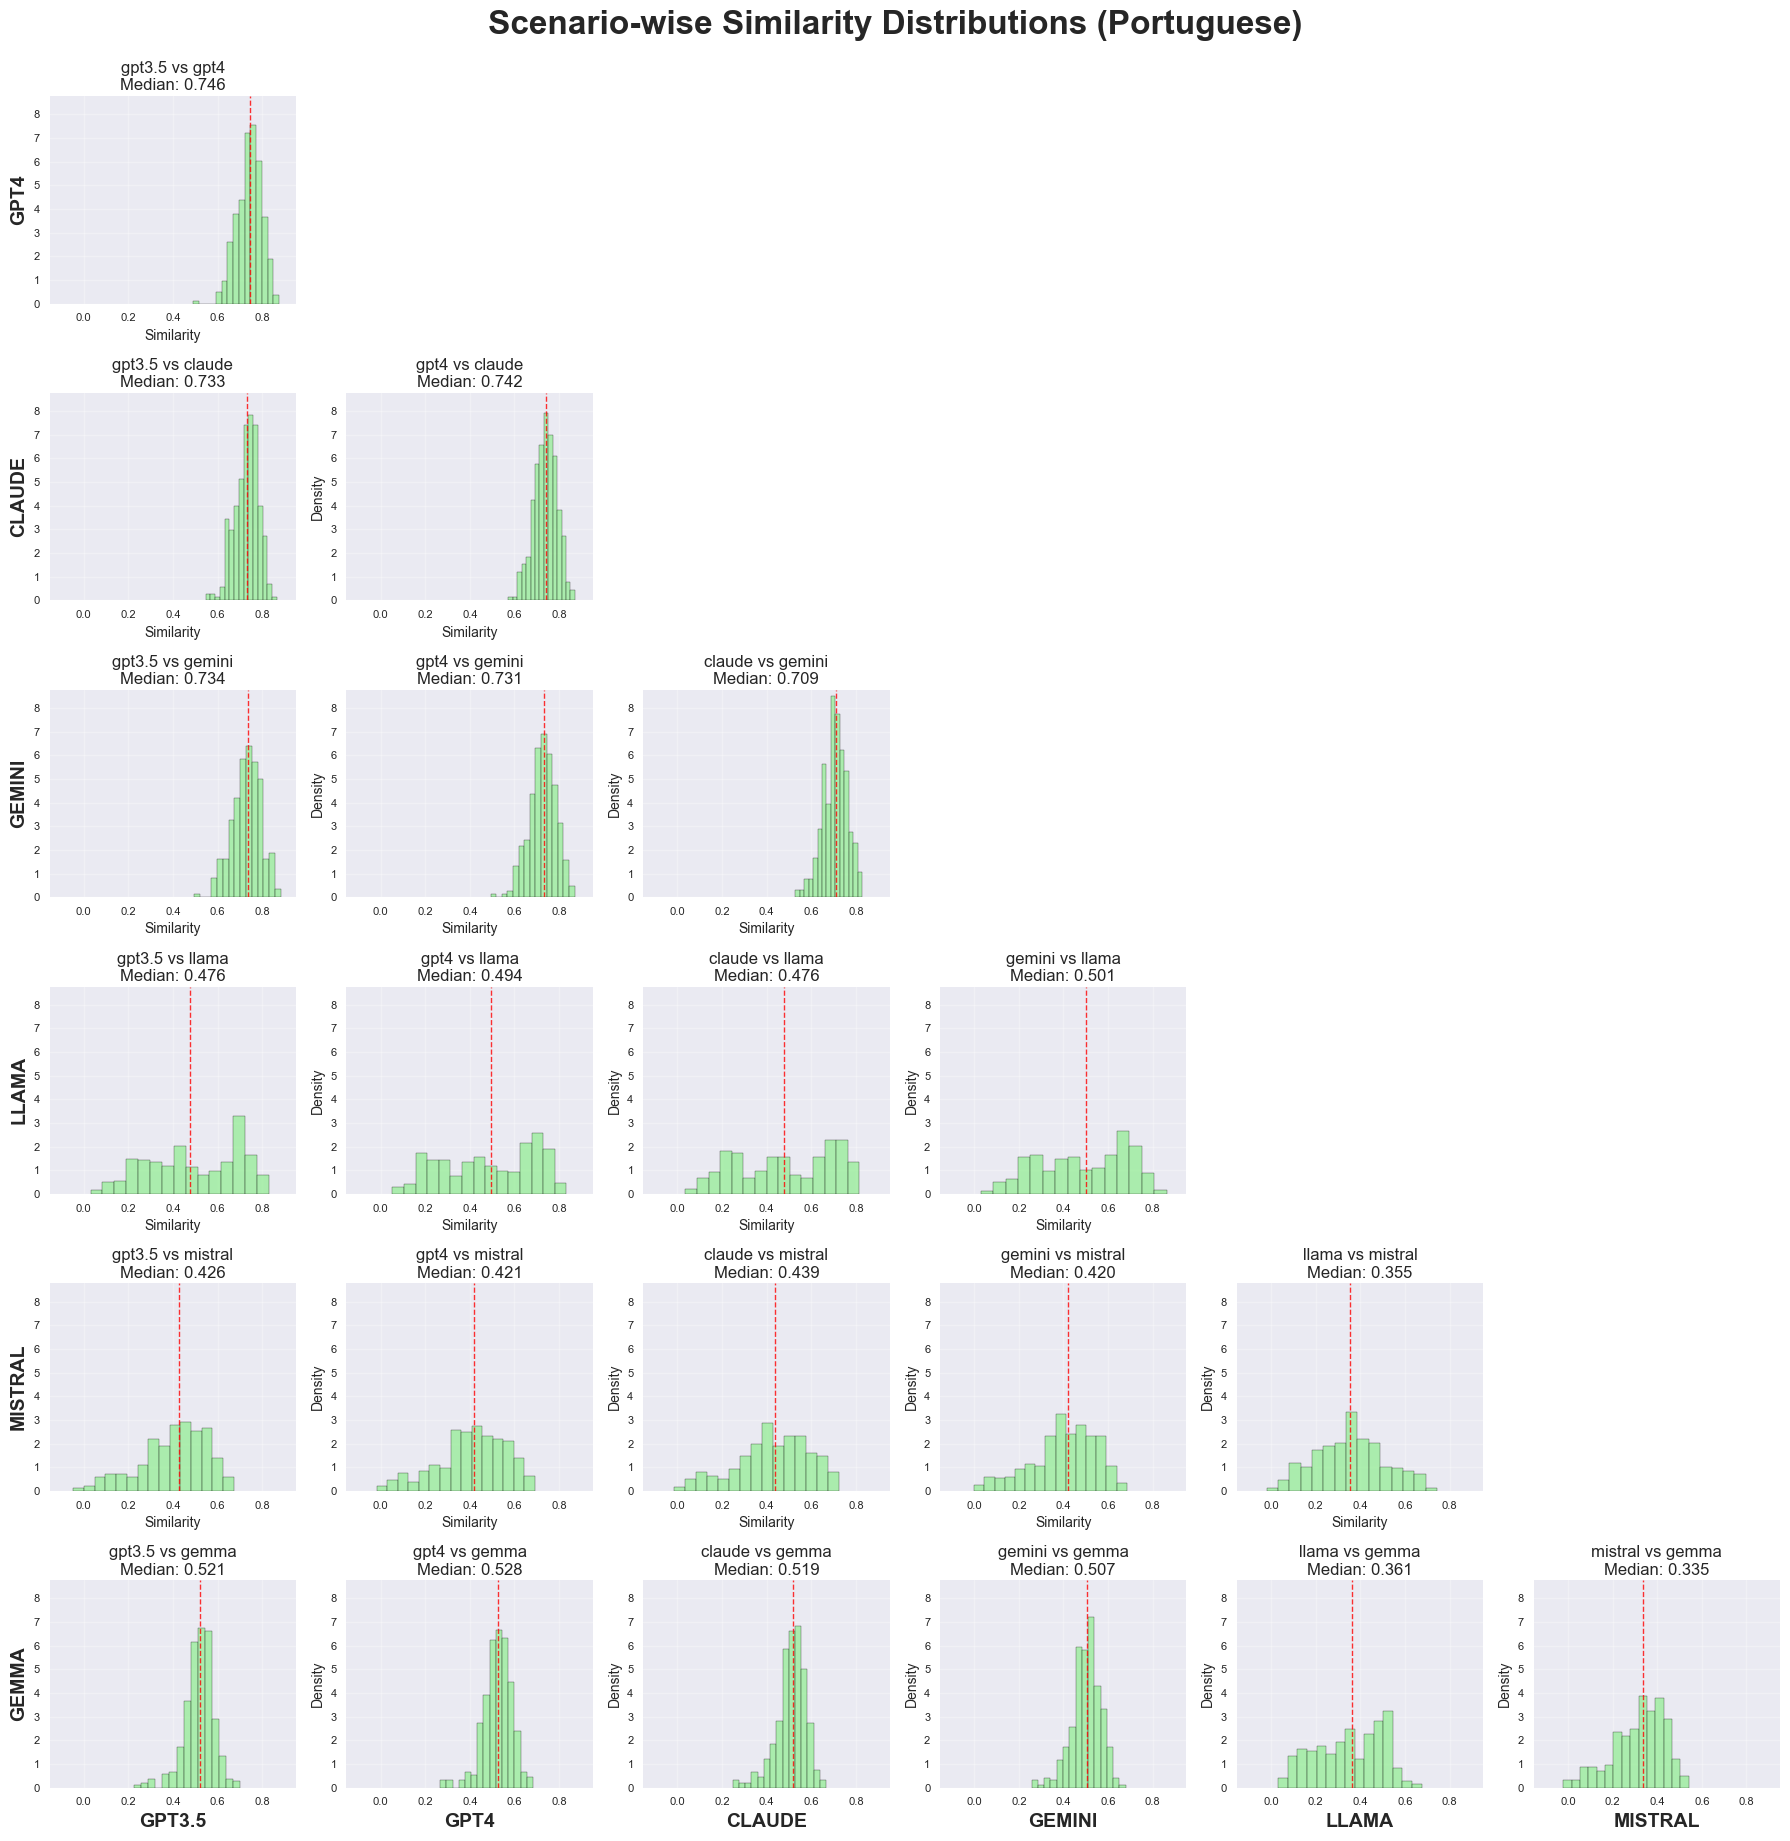

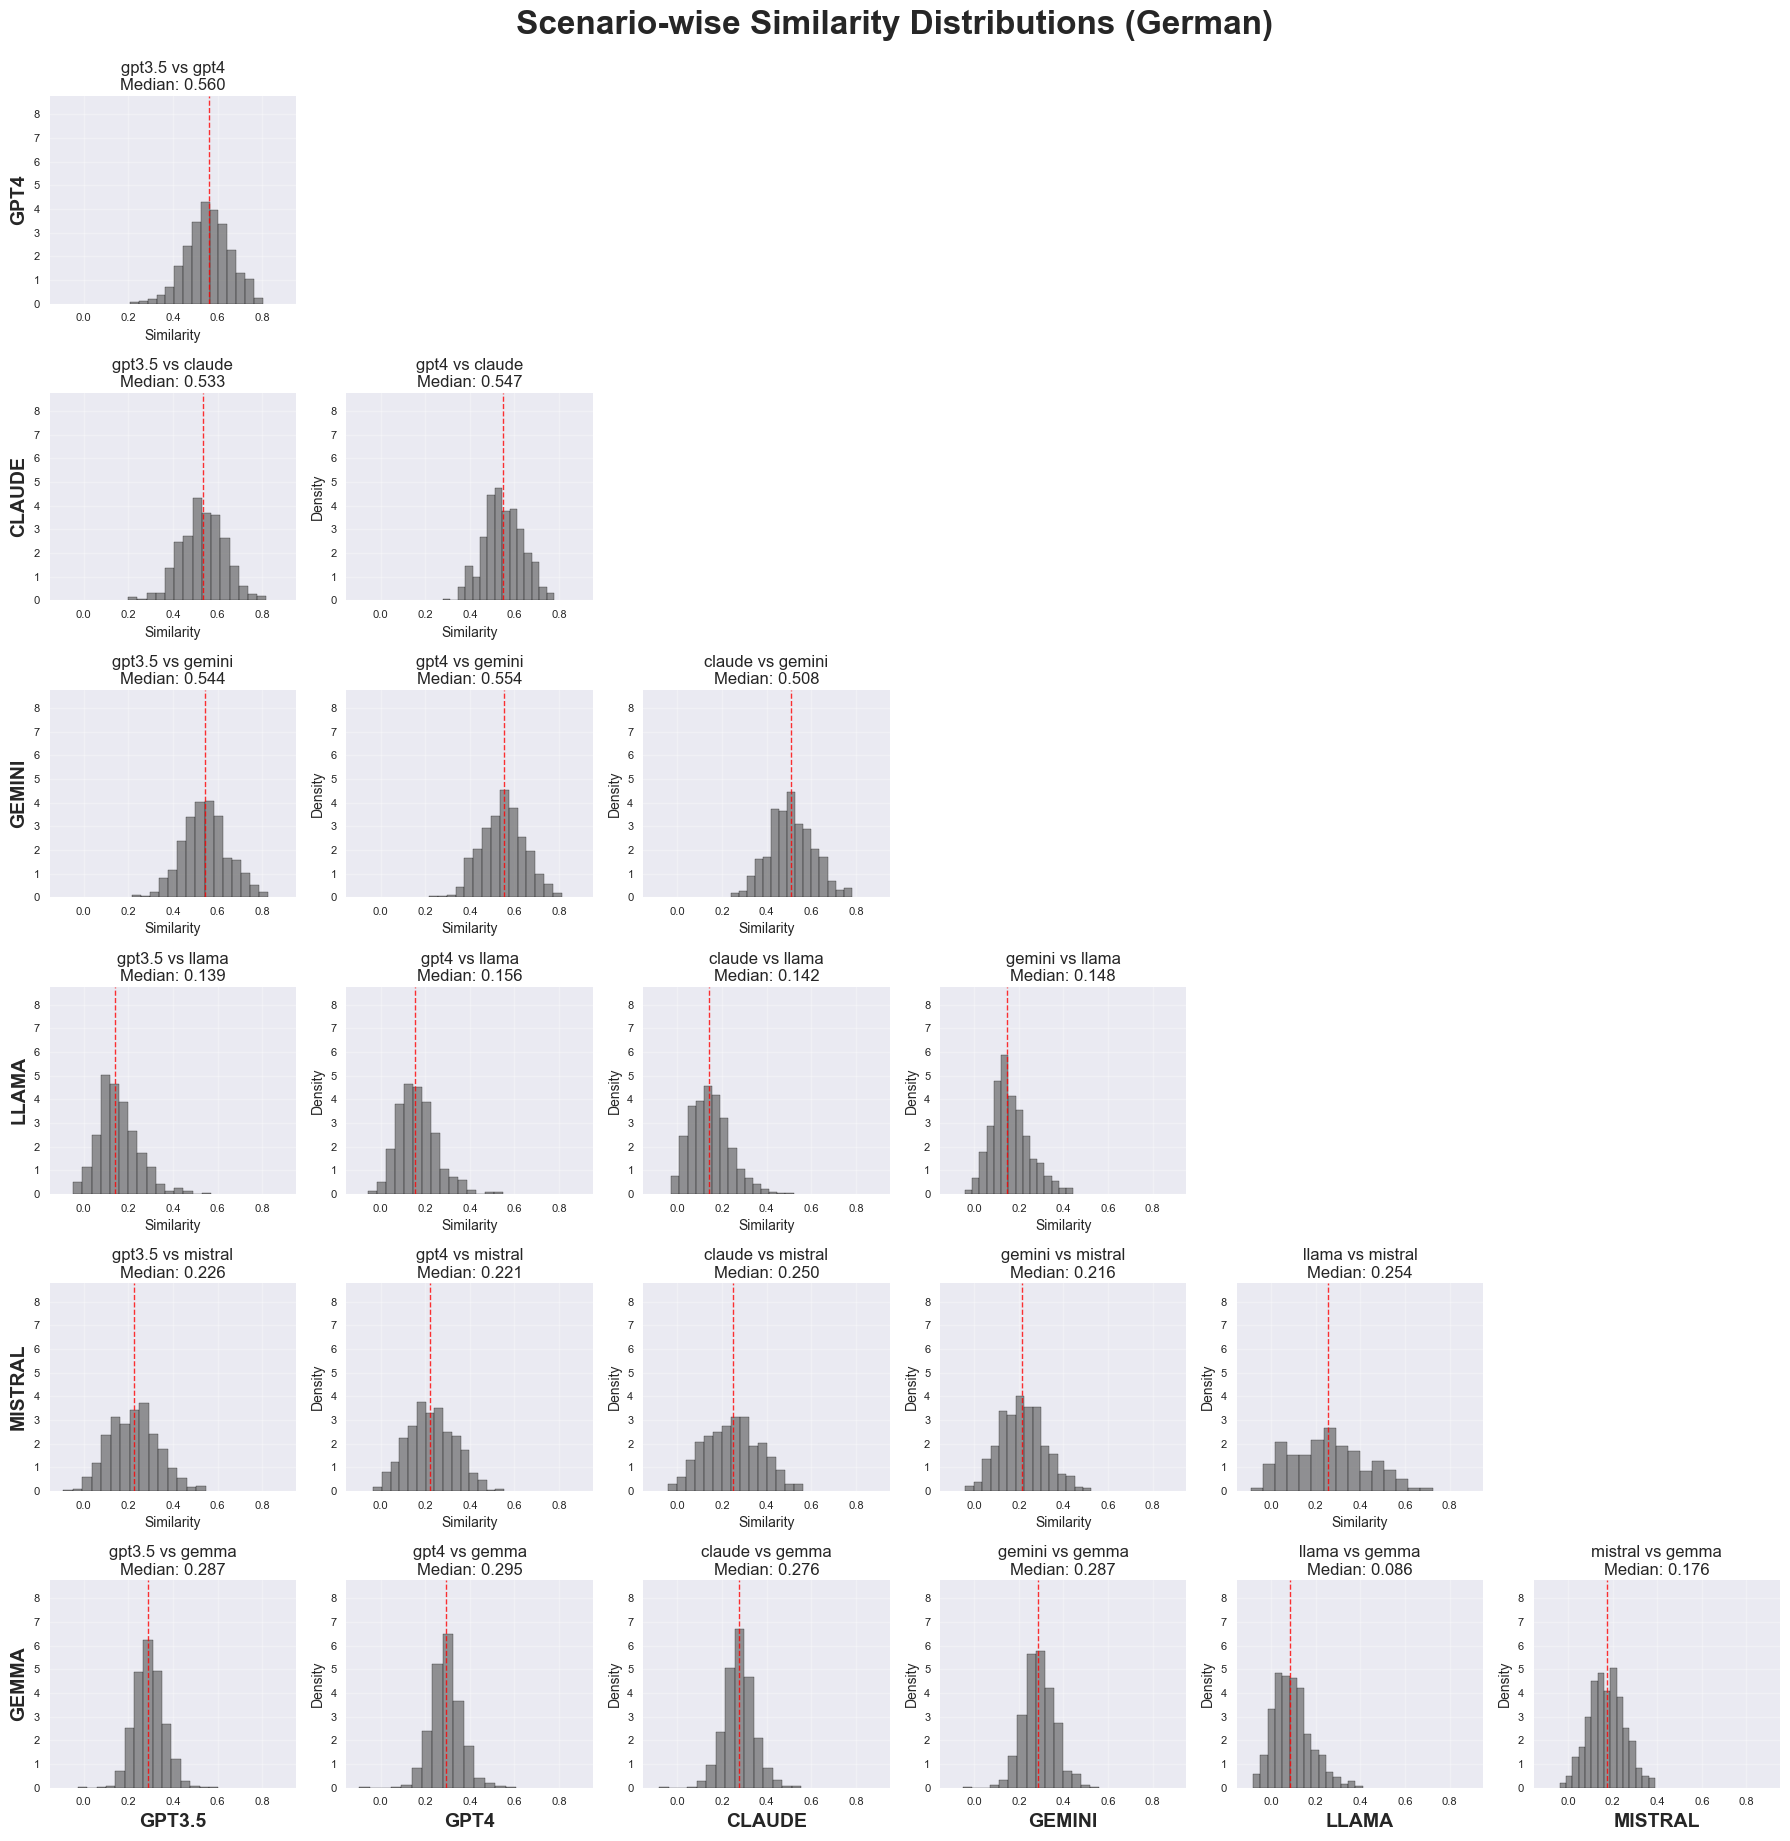

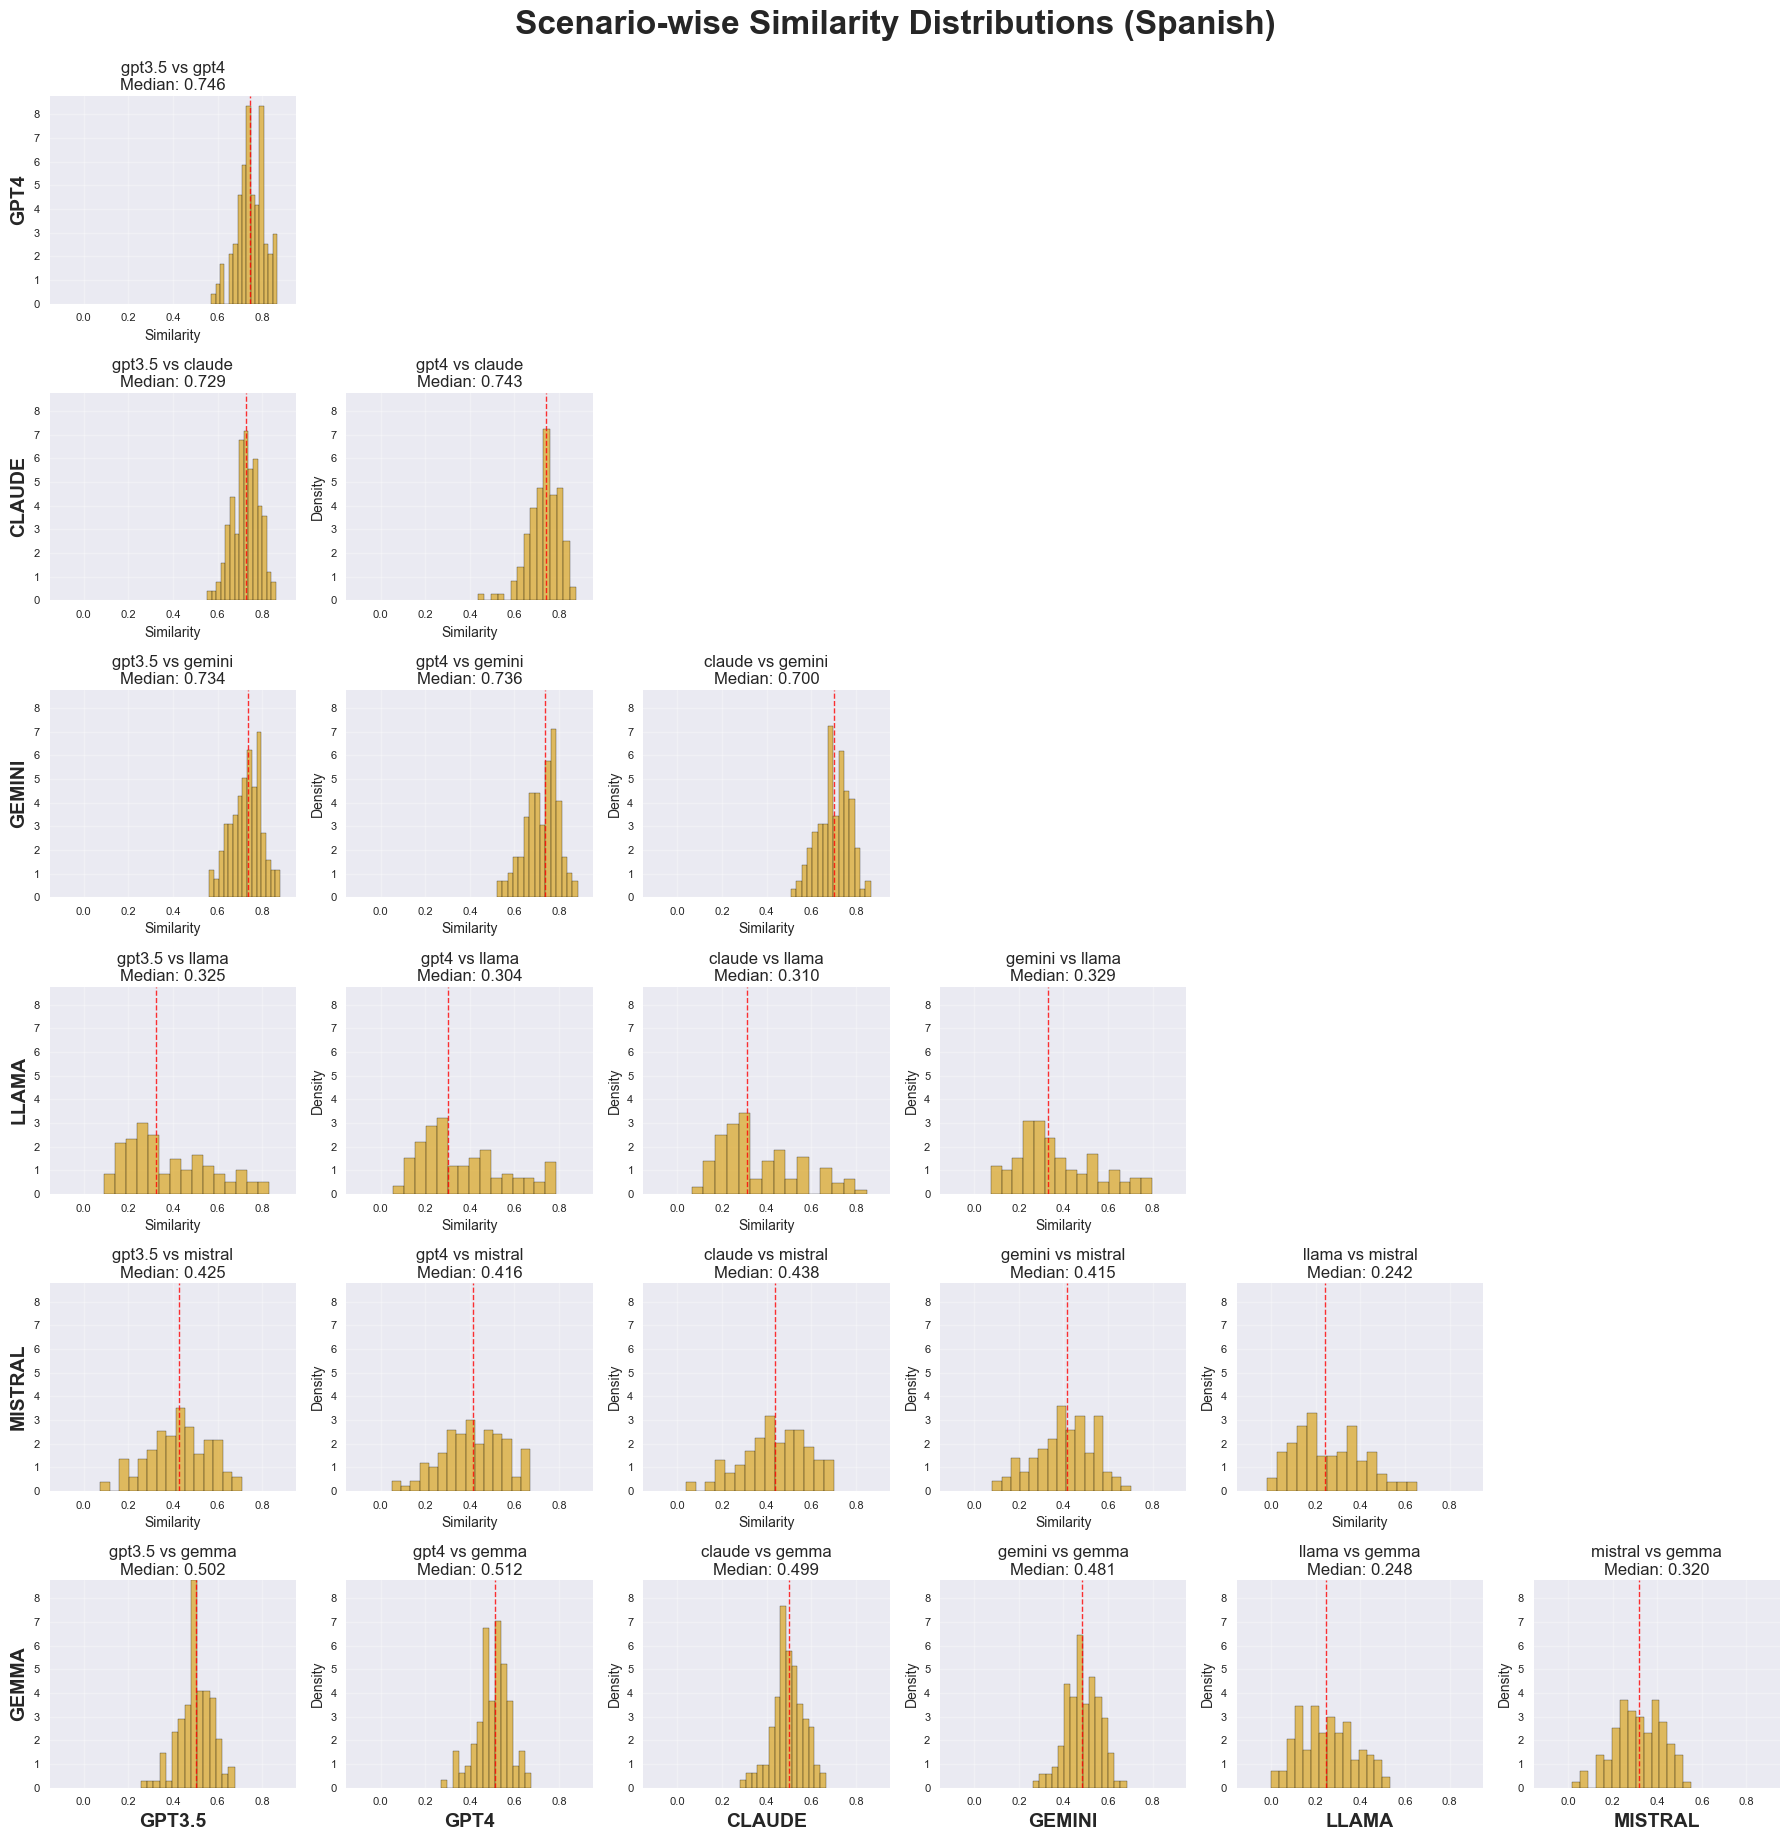

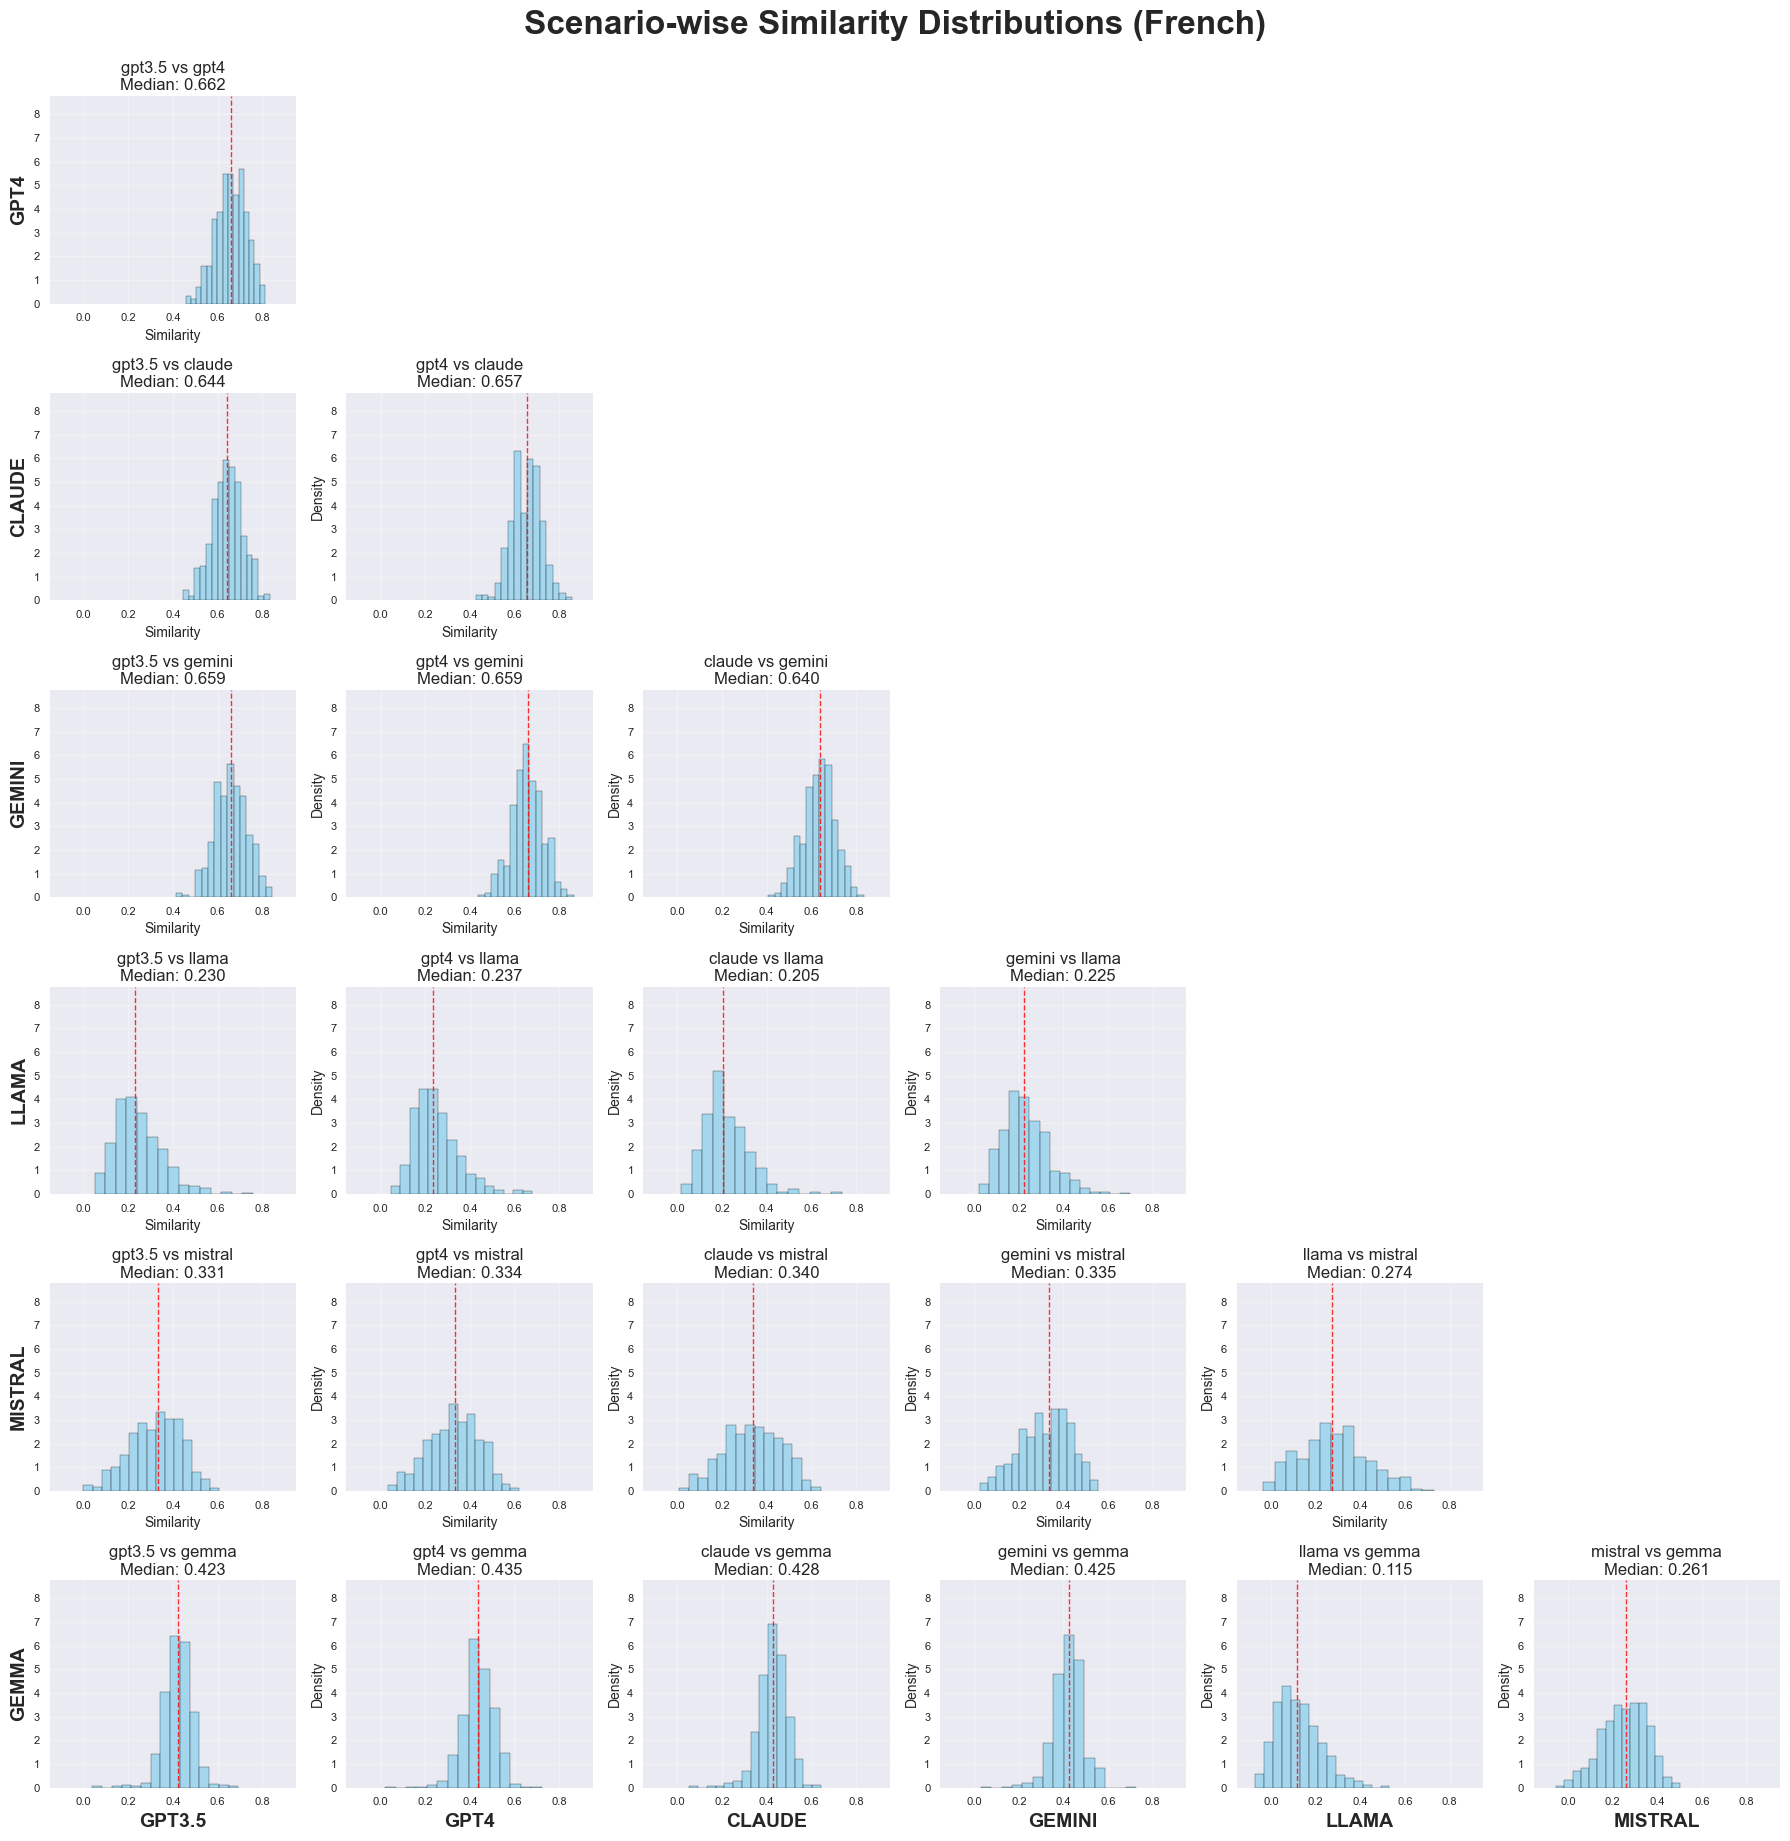

In [ ]:
# %% Visualize scenario-wise similarities with standardized axis ranges

plot_row_similarity_comparison(row_similarities_base, "Base", global_bounds)
plot_row_similarity_comparison(row_similarities_br, "Portuguese", global_bounds)
plot_row_similarity_comparison(row_similarities_de, "German", global_bounds)
plot_row_similarity_comparison(row_similarities_es, "Spanish", global_bounds)
plot_row_similarity_comparison(row_similarities_fr, "French", global_bounds)

In [ ]:
# %% Statistical summary of scenario-wise similarities

row_summary_df_base = summarize_row_characteristics(row_similarities_base, "Base")
row_summary_df_br = summarize_row_characteristics(row_similarities_br, "Portuguese")
row_summary_df_de = summarize_row_characteristics(row_similarities_de, "German")
row_summary_df_es = summarize_row_characteristics(row_similarities_es, "Spanish")
row_summary_df_fr = summarize_row_characteristics(row_similarities_fr, "French")


=== SCENARIO-WISE SIMILARITY SUMMARY (BASE) ===

     Actor_1  Actor_2  Mean_Similarity  Std_Similarity  Min_Similarity  \
24     bison    gemma           0.6163          0.0846          0.2310   
22     bison    llama           0.6382          0.0804          0.3118   
23     bison  mistral           0.5911          0.0932          0.0899   
18    claude    bison           0.6690          0.0800          0.3140   
21    claude    gemma           0.7486          0.0656          0.3976   
19    claude    llama           0.7963          0.0575          0.5093   
20    claude  mistral           0.7228          0.0729          0.1738   
9     gpt3.5    bison           0.6453          0.0888          0.2270   
8     gpt3.5   claude           0.7755          0.0725          0.4086   
12    gpt3.5    gemma           0.7148          0.0758          0.2348   
7     gpt3.5     gpt4           0.7092          0.0938          0.2847   
10    gpt3.5    llama           0.7468          0.0732        

In [ ]:
# %% Save scenario-wise analysis results

save_analysis_results("base", row_summary_df_base, "scenario_wise")
save_analysis_results("br", row_summary_df_br, "scenario_wise")
save_analysis_results("de", row_summary_df_de, "scenario_wise")
save_analysis_results("es", row_summary_df_es, "scenario_wise")
save_analysis_results("fr", row_summary_df_fr, "scenario_wise")

In [ ]:
# %% Display LLM-Human similarity edge cases

df_cleaned_base = pd.read_csv("../data/moral_dilemmas_cleaned.csv")
df_cleaned_br = pd.read_csv("../data/moral_dilemmas_cleaned_br.csv")
df_cleaned_de = pd.read_csv("../data/moral_dilemmas_cleaned_de.csv")
df_cleaned_es = pd.read_csv("../data/moral_dilemmas_cleaned_es.csv")
df_cleaned_fr = pd.read_csv("../data/moral_dilemmas_cleaned_fr.csv")

display_edge_llm_human_similarities(row_similarities_base, df_cleaned_base, "Base")
display_edge_llm_human_similarities(row_similarities_br, df_cleaned_br, "Portuguese")
display_edge_llm_human_similarities(row_similarities_de, df_cleaned_de, "German")
display_edge_llm_human_similarities(row_similarities_es, df_cleaned_es, "Spanish")
display_edge_llm_human_similarities(row_similarities_fr, df_cleaned_fr, "French")


EDGE LLM-REDDITOR SIMILARITY CASES (BASE)


TOP 5 LOWEST SIMILARITY CASES (Most semantically different answers)
------------------------------------------------------------

1. Similarity: -0.1532 | Scenario ID: 10k87yt | Model: GPT3.5
   Title: AITA for calling my sister a manipulitive bitch and calling CPS
   Redditor Comment: INFO: How did you accumulate four years of missed credits in the few weeks you initially missed school before dropping out? Something really isn't adding up here.
   GPT3.5 Reasoning: While the sister's behavior of pressuring and guilt-tripping the OP is manipulative and unfair, the OP's response of name-calling and threatening a restraining order is also inappropriate. Additionally, reporting their sister to CPS may have been necessary to protect the child, but it also escalates the situation and contributes to the overall dysfunction between the family members.

2. Similarity: -0.0980 | Scenario ID: yzn9gt | Model: GPT4
   Title: AITA for not letting my girl

# %% [markdown]

 ## 2. Actor-wise Analysis

 This analysis compares how a same actor responds to different moral dilemmas.
 For each actor, we calculate the similarity between all pairs of scenarios.

In [ ]:
# %% Actor-wise similarity analysis

column_similarities_base = analyze_column_similarities(
    embeddings_dict_base, actors_base, reason_types_base
)
column_similarities_br = analyze_column_similarities(
    embeddings_dict_br, actors_br, reason_types_br
)
column_similarities_de = analyze_column_similarities(
    embeddings_dict_de, actors_de, reason_types_de
)
column_similarities_es = analyze_column_similarities(
    embeddings_dict_es, actors_es, reason_types_es
)
column_similarities_fr = analyze_column_similarities(
    embeddings_dict_fr, actors_fr, reason_types_fr
)

In [ ]:
# %% Compute global bounds for standardized column plotting

all_column_similarities = {
    "Base": column_similarities_base,
    "Portuguese": column_similarities_br,
    "German": column_similarities_de,
    "Spanish": column_similarities_es,
    "French": column_similarities_fr,
}
global_column_bounds = compute_global_column_similarity_bounds(all_column_similarities)

Plotting histograms: 100%|██████████| 8/8 [00:05<00:00,  1.45it/s]


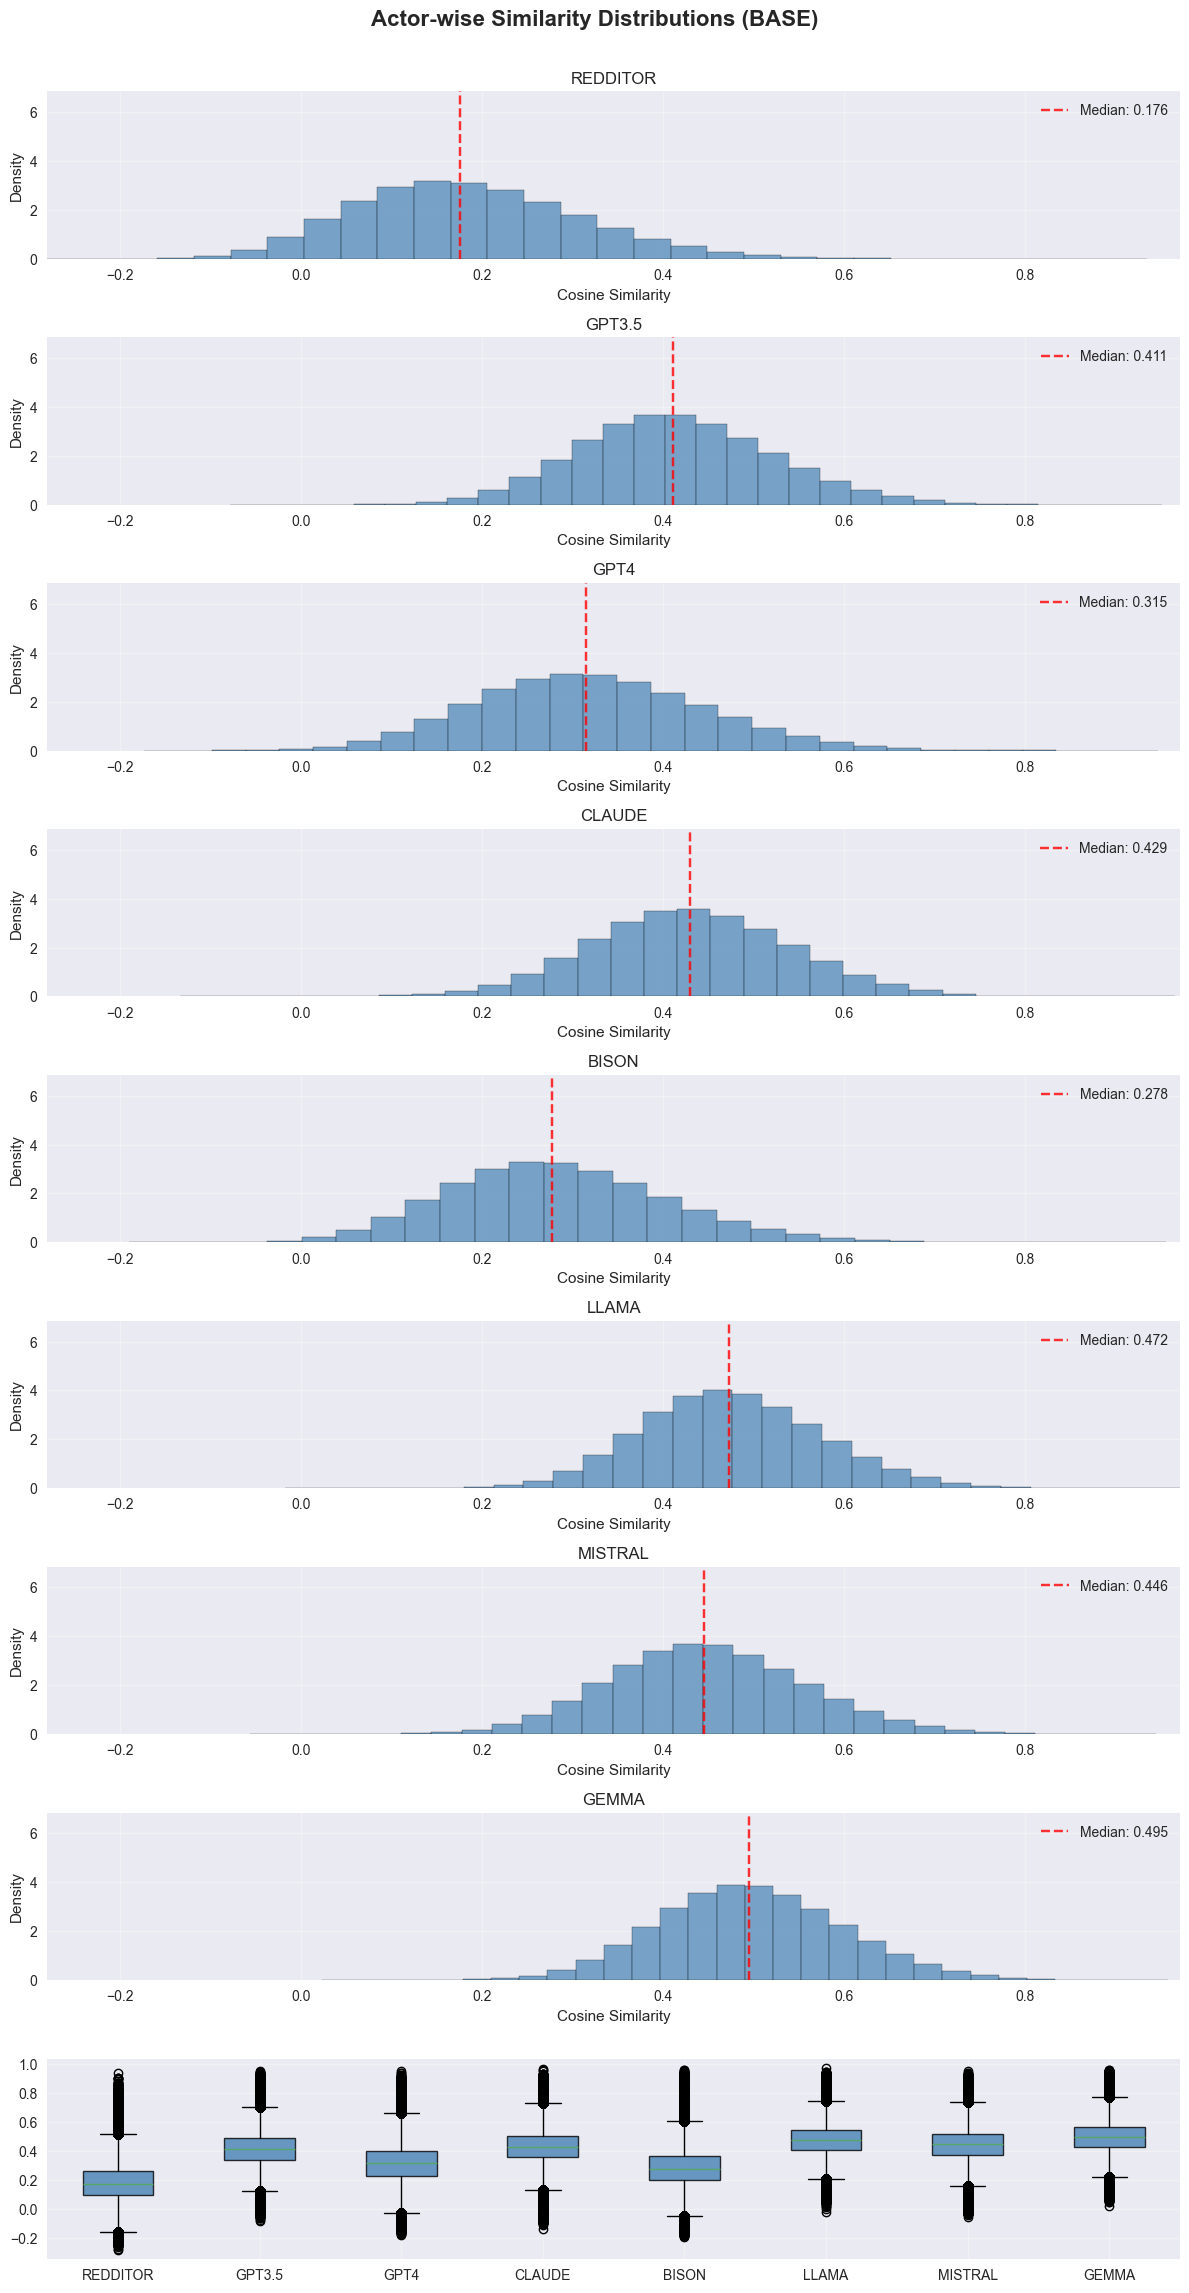

Plotting histograms: 100%|██████████| 8/8 [00:00<00:00, 175.39it/s]


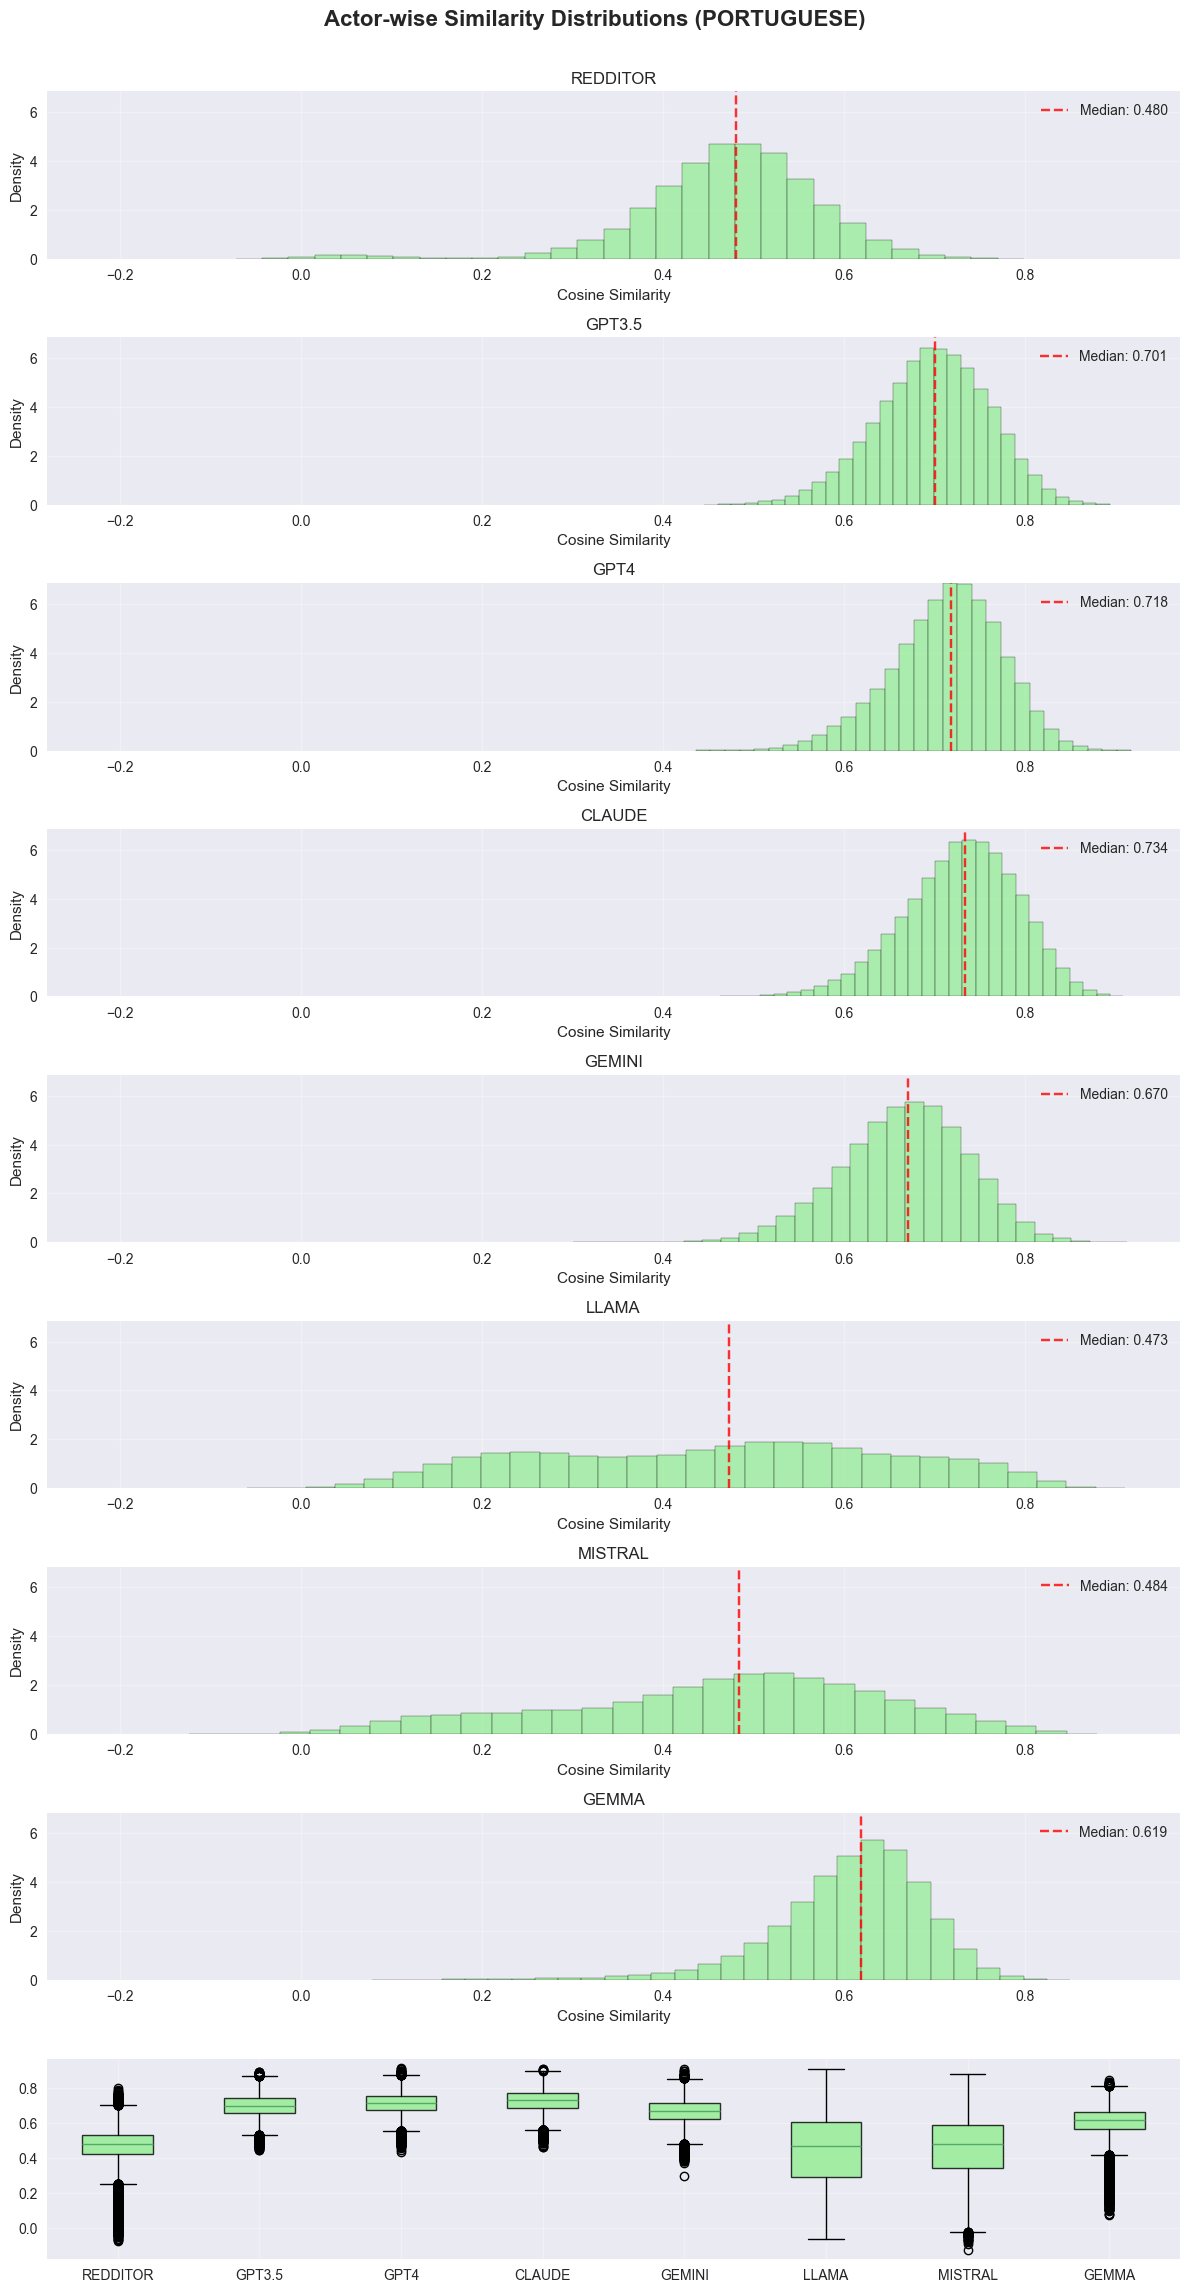

Plotting histograms: 100%|██████████| 8/8 [00:00<00:00, 146.47it/s]


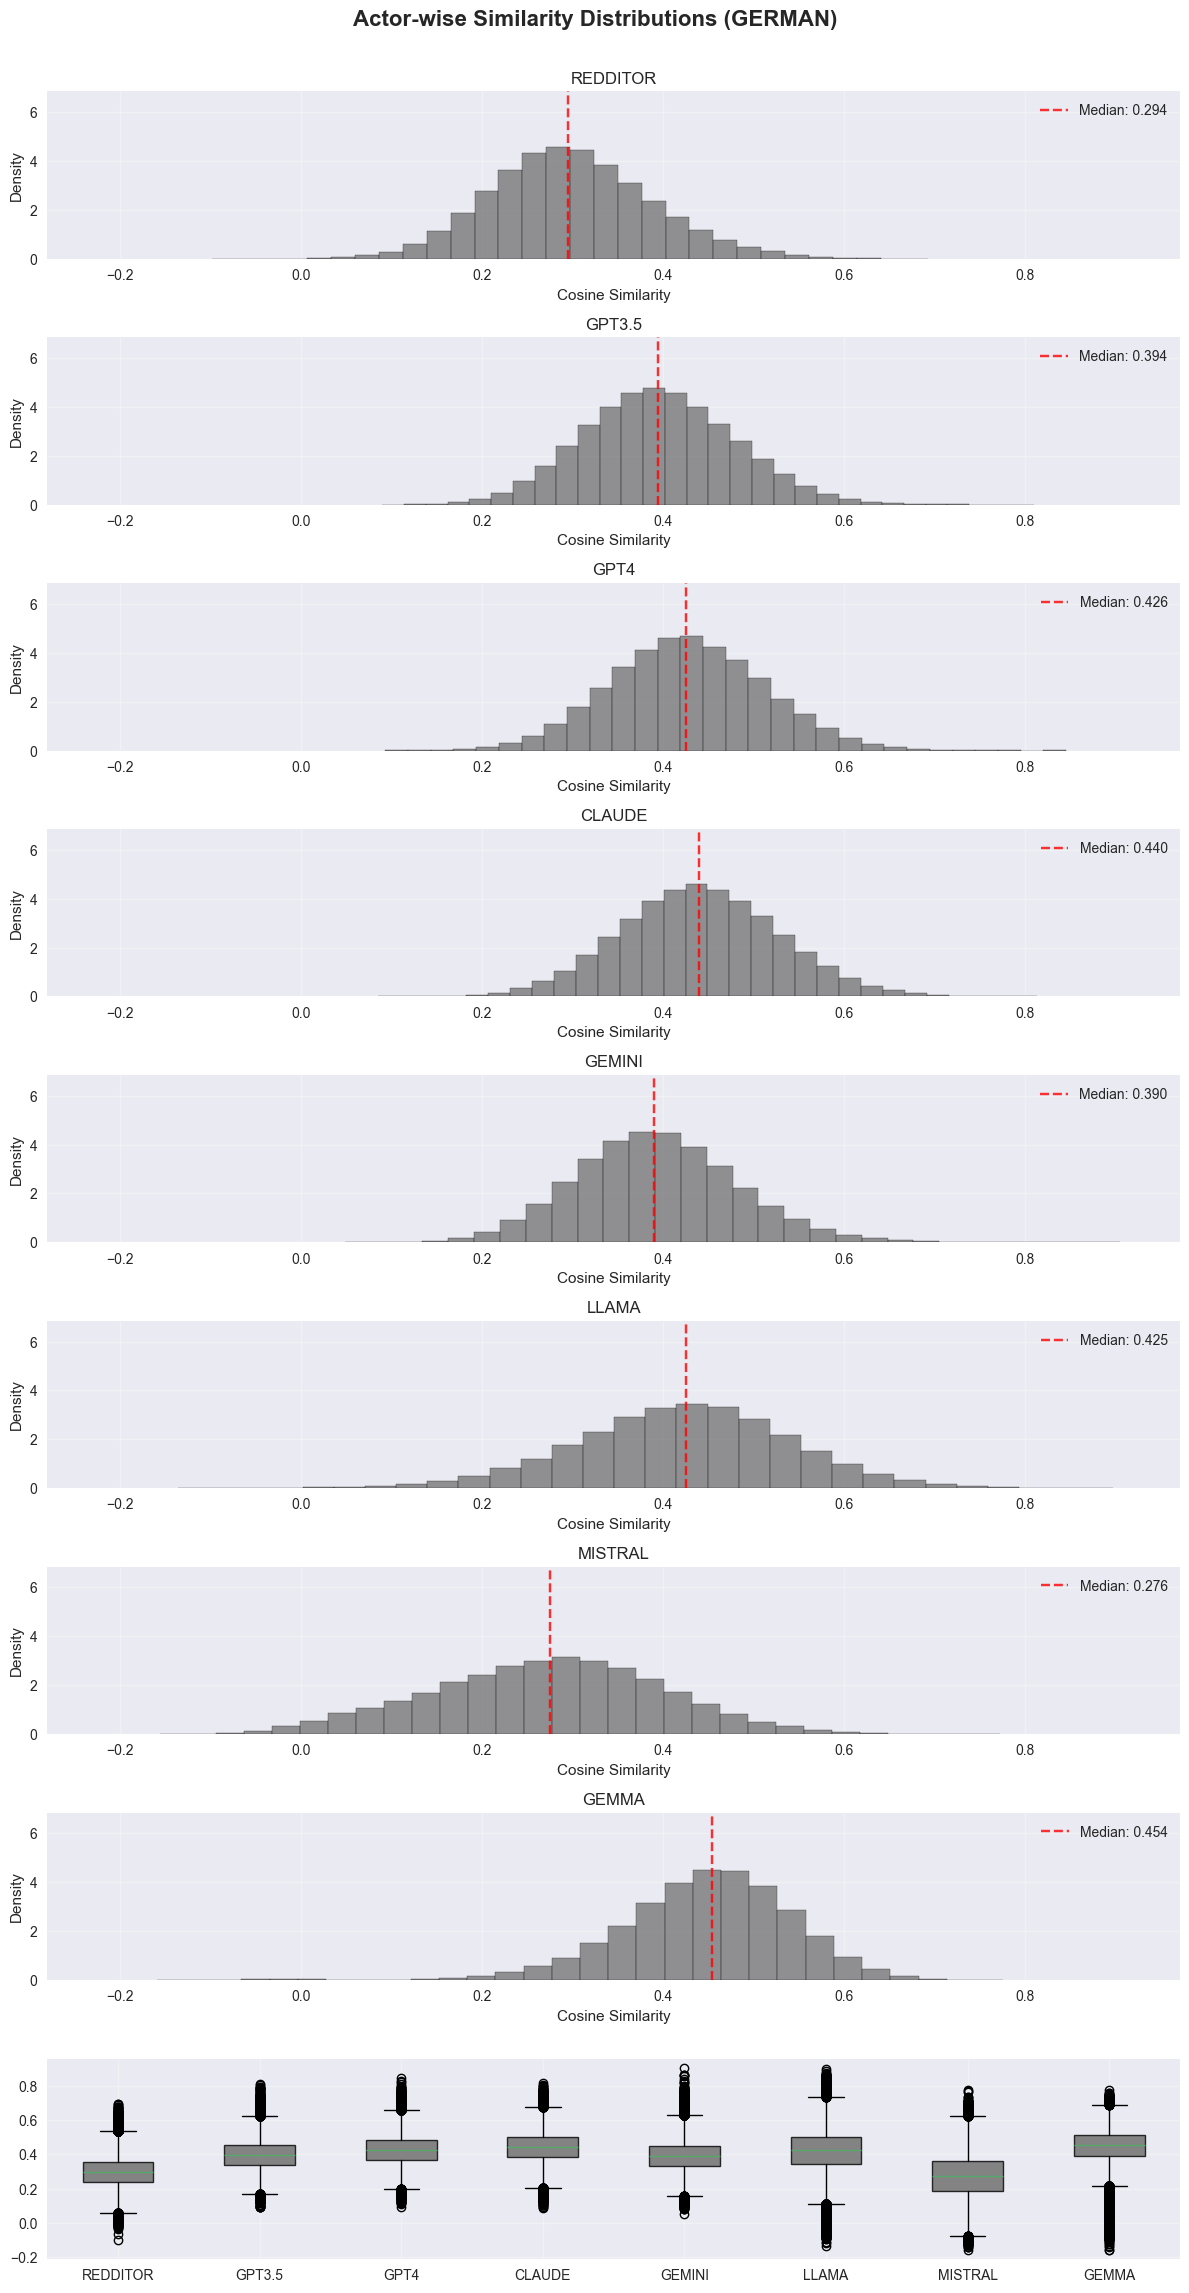

Plotting histograms: 100%|██████████| 8/8 [00:00<00:00, 185.62it/s]


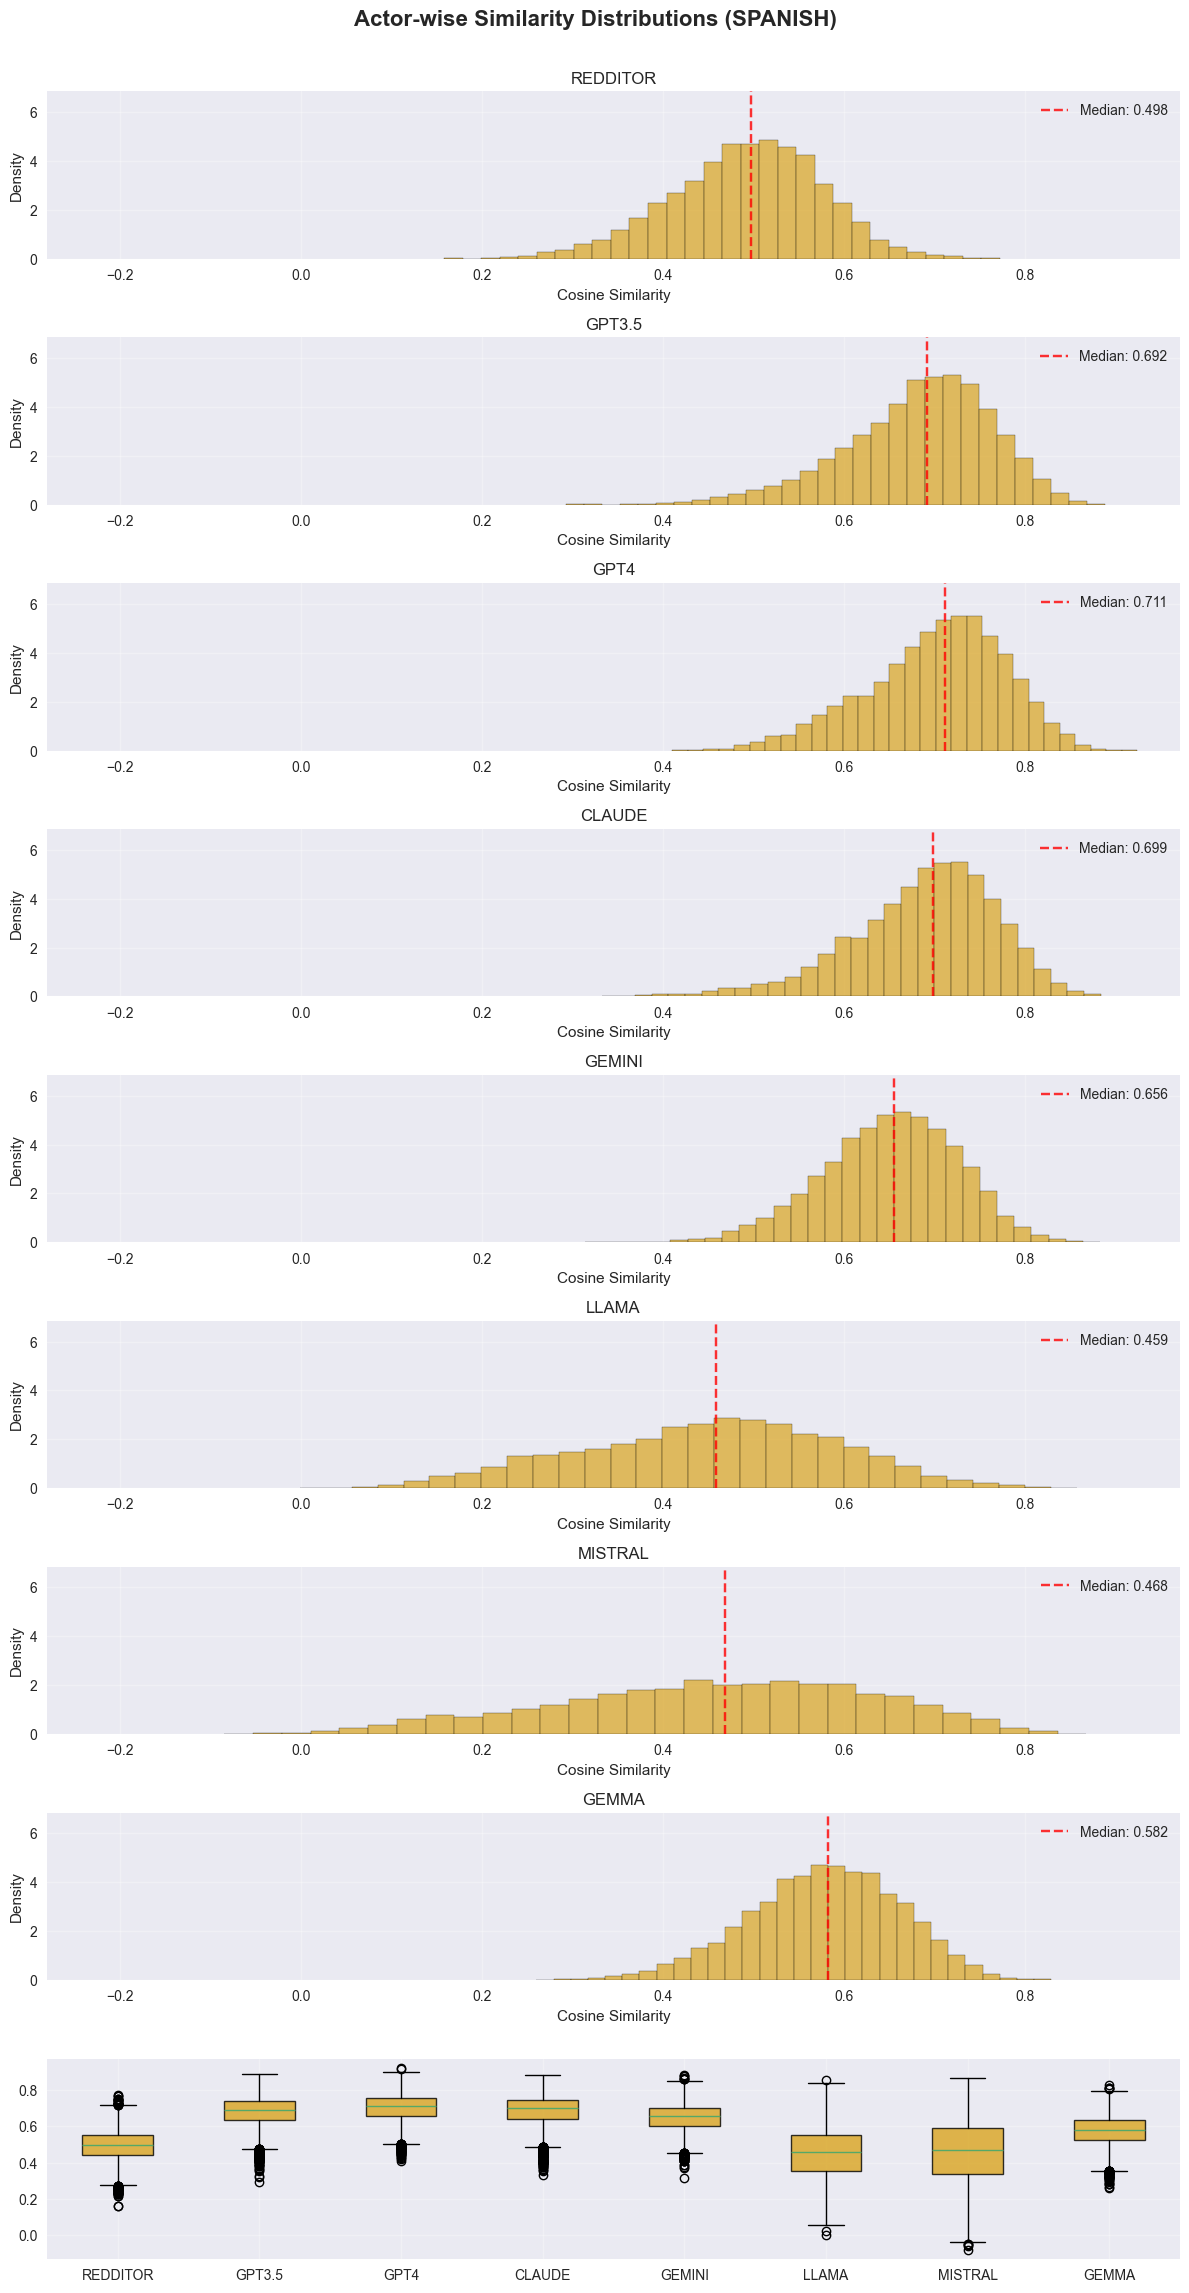

Plotting histograms: 100%|██████████| 8/8 [00:00<00:00, 158.92it/s]


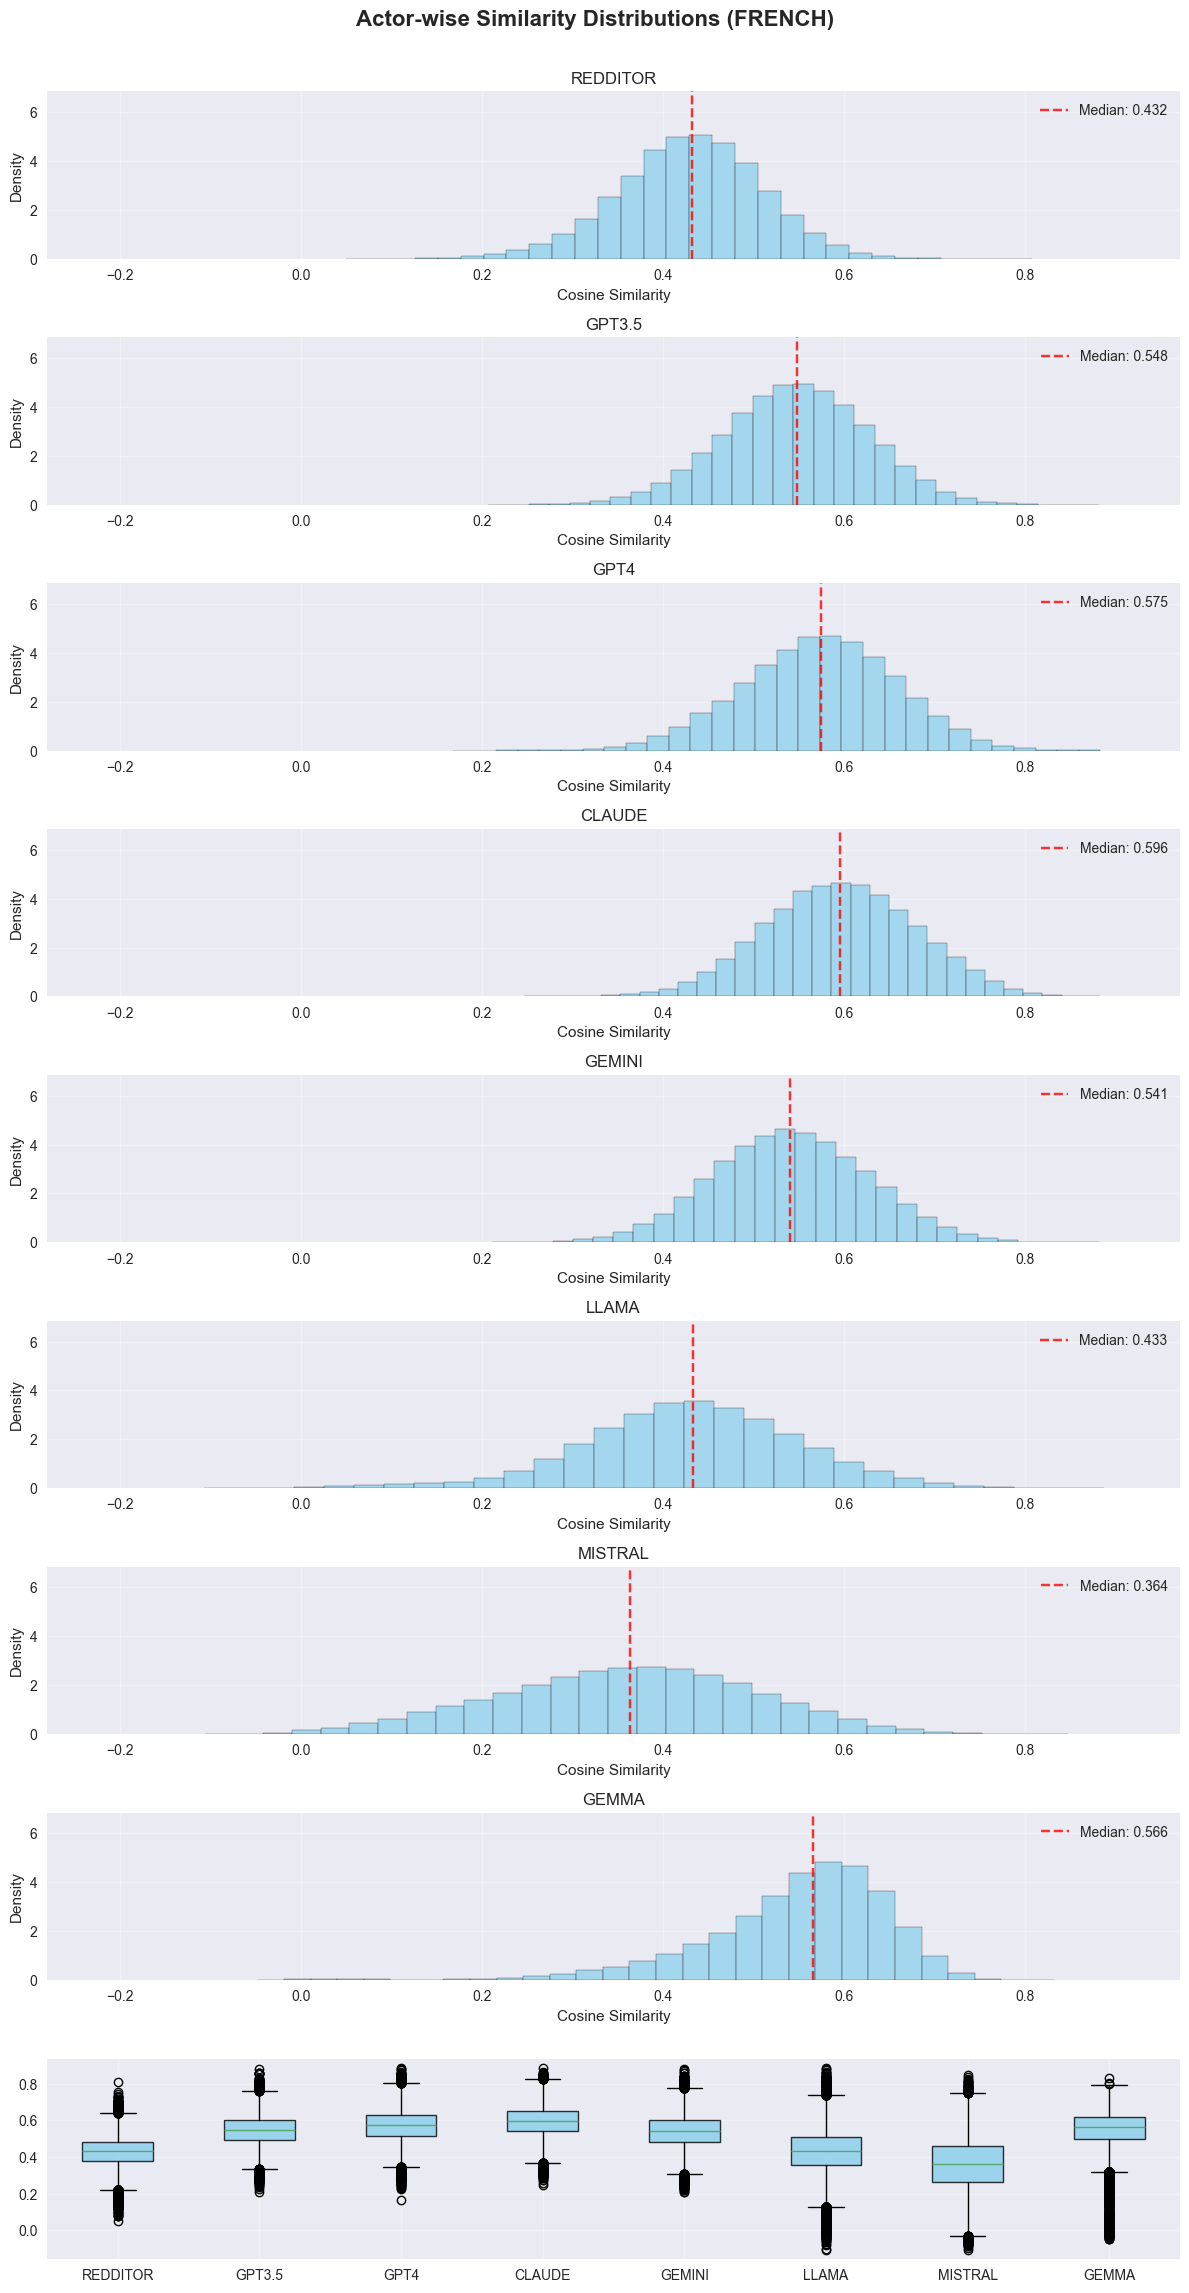

In [ ]:
# %% Visualize actor-wise similarities with standardized axis ranges

plot_column_similarity_comparison(
    column_similarities_base, "Base", global_column_bounds
)
plot_column_similarity_comparison(
    column_similarities_br, "Portuguese", global_column_bounds
)
plot_column_similarity_comparison(
    column_similarities_de, "German", global_column_bounds
)
plot_column_similarity_comparison(
    column_similarities_es, "Spanish", global_column_bounds
)
plot_column_similarity_comparison(
    column_similarities_fr, "French", global_column_bounds
)

In [ ]:
# %% Statistical summary of actor-wise differences

column_summary_df_base = summarize_column_characteristics(
    column_similarities_base, "Base"
)
column_summary_df_br = summarize_column_characteristics(
    column_similarities_br, "Portuguese"
)
column_summary_df_de = summarize_column_characteristics(
    column_similarities_de, "German"
)
column_summary_df_es = summarize_column_characteristics(
    column_similarities_es, "Spanish"
)
column_summary_df_fr = summarize_column_characteristics(
    column_similarities_fr, "French"
)


=== ACTOR-WISE SIMILARITY SUMMARY (BASE) ===

      Actor  Mean Similarity  Std Similarity  Min Similarity  Max Similarity  \
4     bison           0.2848          0.1209         -0.1905          0.9563   
3    claude           0.4313          0.1092         -0.1344          0.9658   
7     gemma           0.4982          0.1011          0.0227          0.9583   
1    gpt3.5           0.4152          0.1072         -0.0790          0.9519   
2      gpt4           0.3194          0.1242         -0.1735          0.9468   
5     llama           0.4765          0.0982         -0.0181          0.9716   
6   mistral           0.4485          0.1069         -0.0565          0.9454   
0  redditor           0.1840          0.1221         -0.2807          0.9355   

      Q25     Q75  
4  0.1995  0.3622  
3  0.3567  0.5049  
7  0.4279  0.5651  
1  0.3408  0.4858  
2  0.2316  0.4024  
5  0.4080  0.5413  
6  0.3748  0.5196  
0  0.0956  0.2641  

=== ACTOR-WISE SIMILARITY SUMMARY (PORTUGUESE) ===


In [ ]:
# %% Save column-wise analysis results

save_analysis_results("base", column_summary_df_base, "actor_wise")
save_analysis_results("br", column_summary_df_br, "actor_wise")
save_analysis_results("de", column_summary_df_de, "actor_wise")
save_analysis_results("es", column_summary_df_es, "actor_wise")
save_analysis_results("fr", column_summary_df_fr, "actor_wise")

In [ ]:
# %% Display scenario similarity edge cases

display_edge_scenario_similarities(
    embeddings_dict_base, actors_base, reason_types_base, df_cleaned_base, "Base"
)
display_edge_scenario_similarities(
    embeddings_dict_br, actors_br, reason_types_br, df_cleaned_br, "Portuguese"
)
display_edge_scenario_similarities(
    embeddings_dict_de, actors_de, reason_types_de, df_cleaned_de, "German"
)
display_edge_scenario_similarities(
    embeddings_dict_es, actors_es, reason_types_es, df_cleaned_es, "Spanish"
)
display_edge_scenario_similarities(
    embeddings_dict_fr, actors_fr, reason_types_fr, df_cleaned_fr, "French"
)

Processing actor 1/8: redditor
Processing actor 2/8: gpt3.5
Processing actor 3/8: gpt4
Processing actor 4/8: claude
Processing actor 5/8: bison
Processing actor 6/8: llama
Processing actor 7/8: mistral
Processing actor 8/8: gemma

EDGE SCENARIO SIMILARITY CASES (BASE)

👥 REDDITOR RESPONSES

TOP 5 LOWEST SIMILARITY CASES (Most semantically different answers)
------------------------------------------------------------

1. Similarity: -0.2807
   Scenario 1 (ID: z0wjz0): AITA for not doing anything for christmas this year and making my husband livid?
   Redditor Comment 1: NTA you have 3 weeks to get a lawyer, move out and get a job. You and children are at the very bottom of his priority list. That is not going to change. Good luck
   Scenario 2 (ID: 11ig2ll): AITA for blowing up at my girlfriend because she keeps zoning out?
   Redditor Comment 2: Info: are you having a conversation or just talking at her without letting her talk at all? Because I’ve dated those guys and of course I was

# %% [markdown]

 ## 3. Reason-wise Analysis

 This analysis compares how consistent each actor's reasonings are when answering the same moral dilemma.

In [ ]:
# %% Reason-wise similarity analysis

reason_similarities_base = load_or_compute_similarities(
    "base", embeddings_dict_base, actors_base, reason_types_base, "reason"
)
reason_similarities_br = load_or_compute_similarities(
    "br", embeddings_dict_br, actors_br, reason_types_br, "reason"
)
reason_similarities_de = load_or_compute_similarities(
    "de", embeddings_dict_de, actors_de, reason_types_de, "reason"
)
reason_similarities_es = load_or_compute_similarities(
    "es", embeddings_dict_es, actors_es, reason_types_es, "reason"
)
reason_similarities_fr = load_or_compute_similarities(
    "fr", embeddings_dict_fr, actors_fr, reason_types_fr, "reason"
)

In [ ]:
# %% Compute global bounds for standardized reason plotting

all_reason_similarities = {
    "Base": reason_similarities_base,
    "Portuguese": reason_similarities_br,
    "German": reason_similarities_de,
    "Spanish": reason_similarities_es,
    "French": reason_similarities_fr,
}
global_reason_bounds = compute_global_reason_similarity_bounds(all_reason_similarities)

Plotting reason similarities: 100%|██████████| 7/7 [00:00<00:00, 175.45it/s]


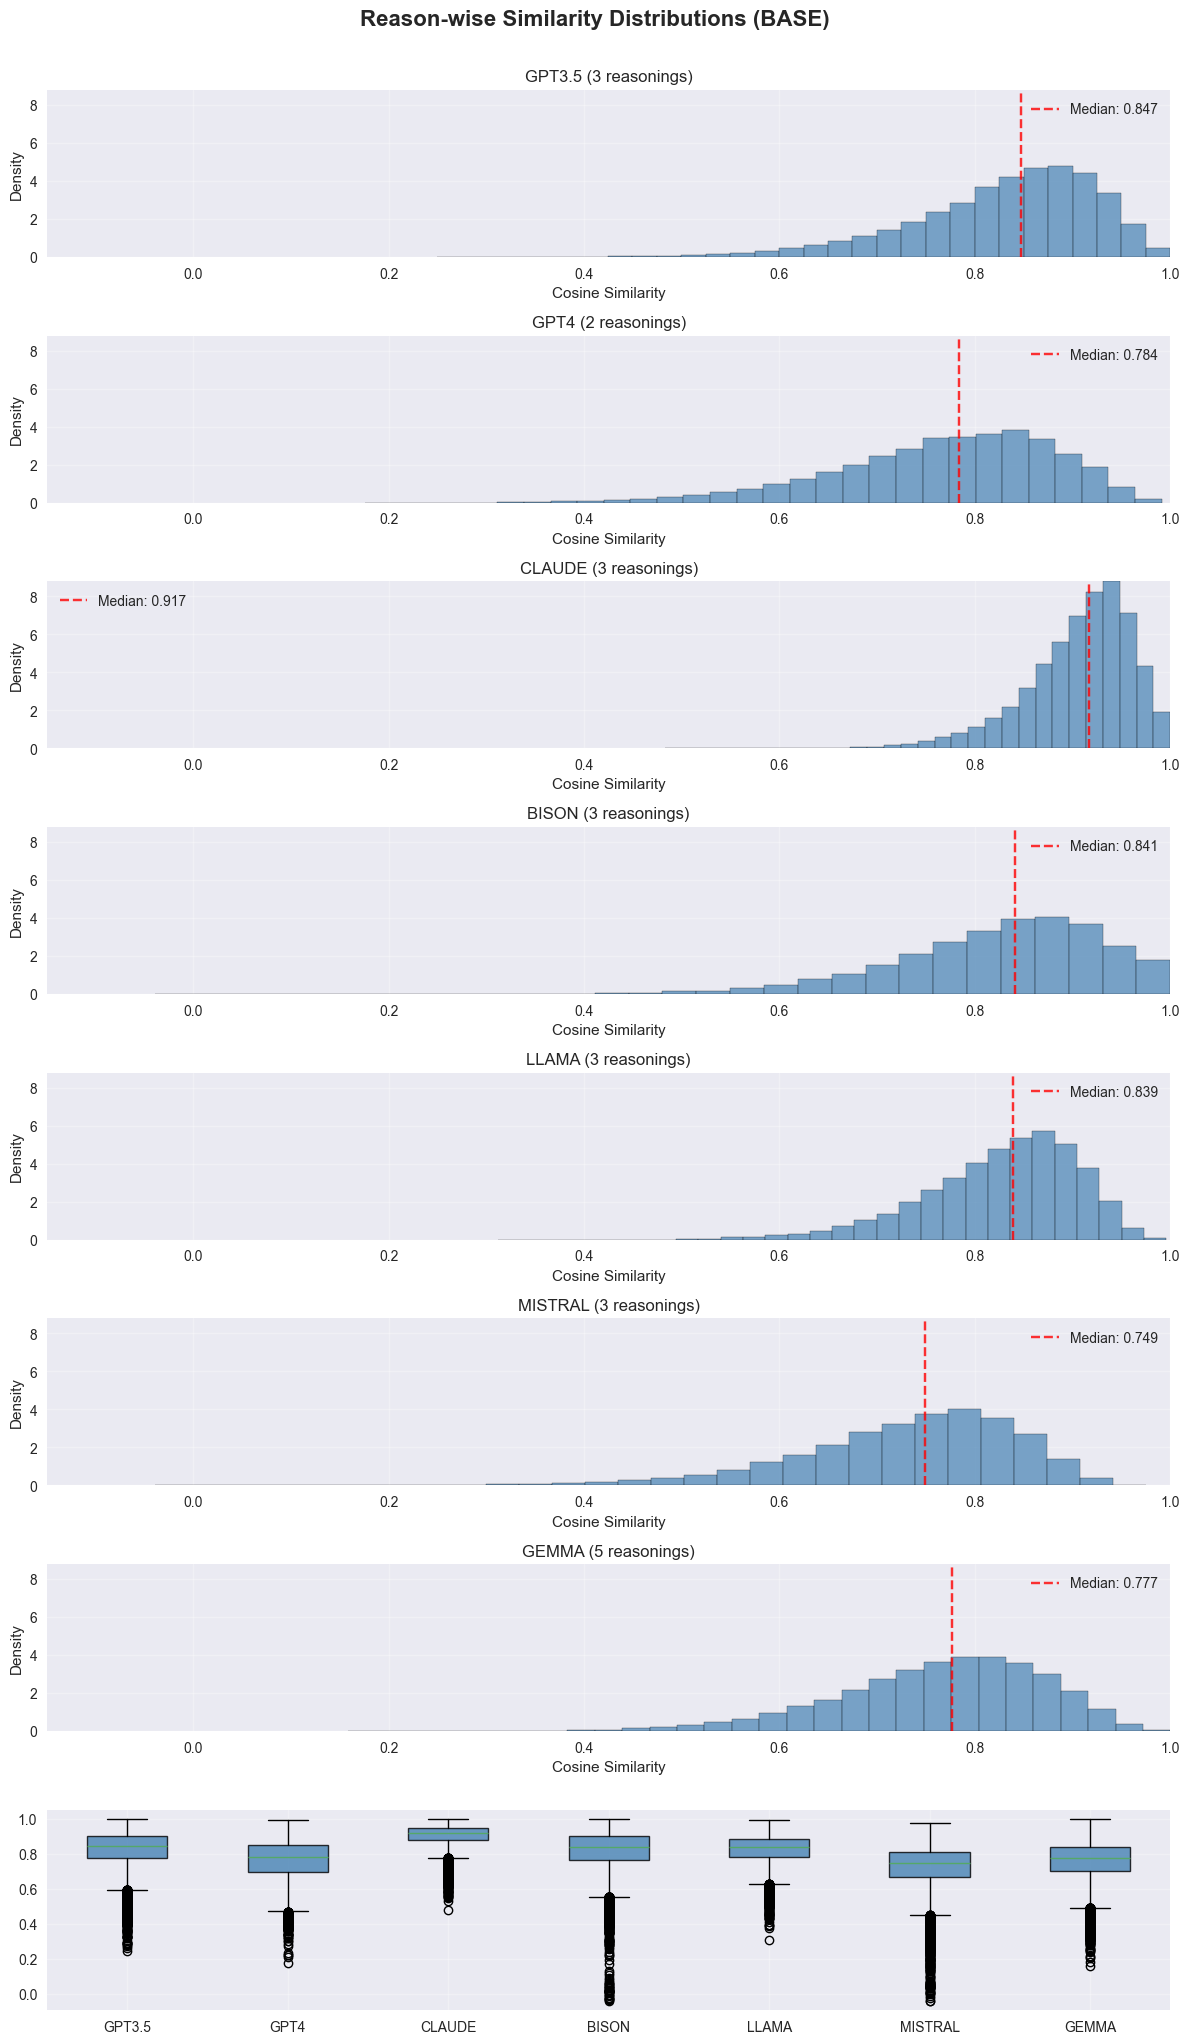

Plotting reason similarities: 100%|██████████| 7/7 [00:00<00:00, 91.93it/s]


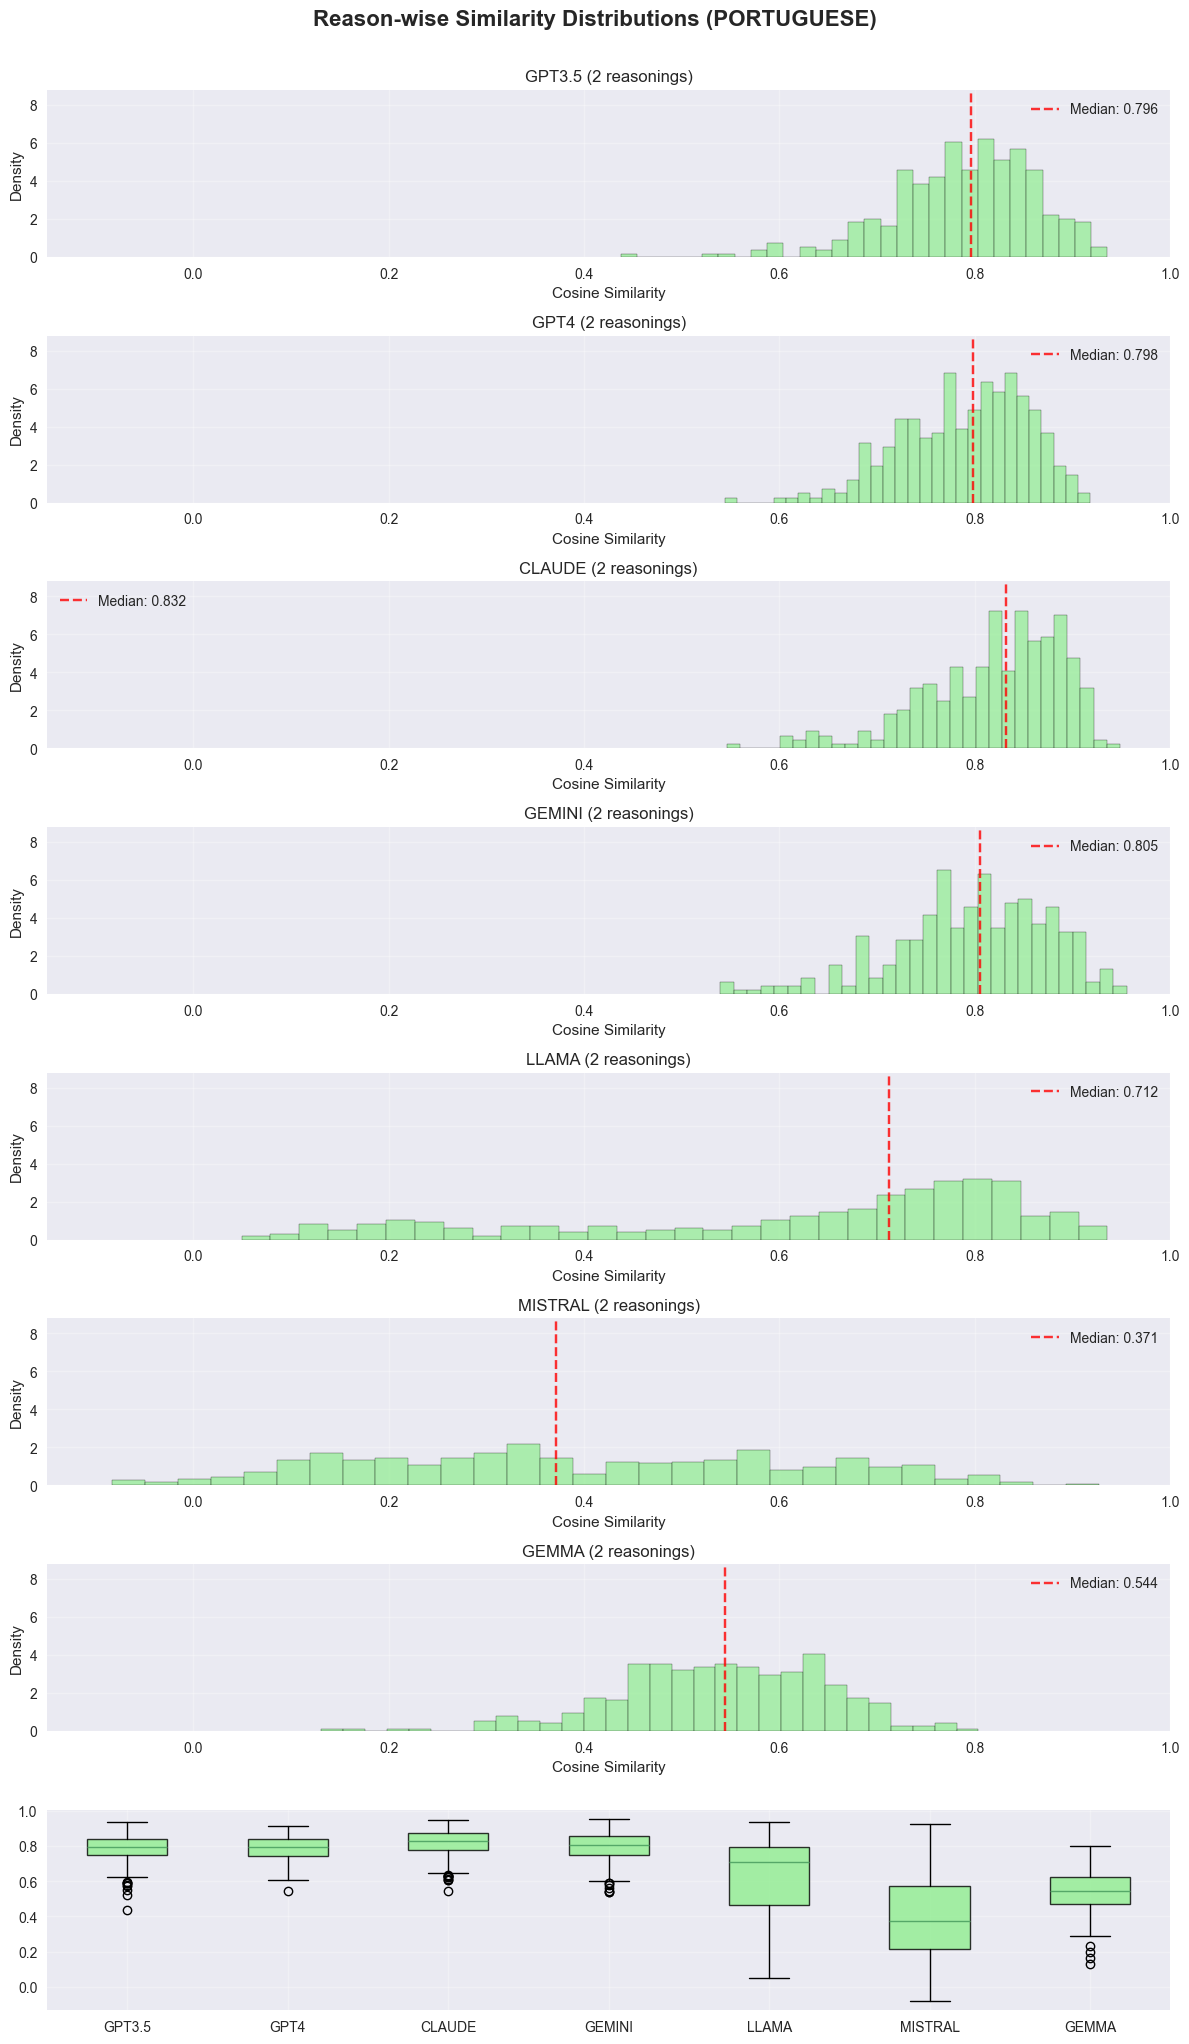

Plotting reason similarities: 100%|██████████| 7/7 [00:00<00:00, 191.37it/s]


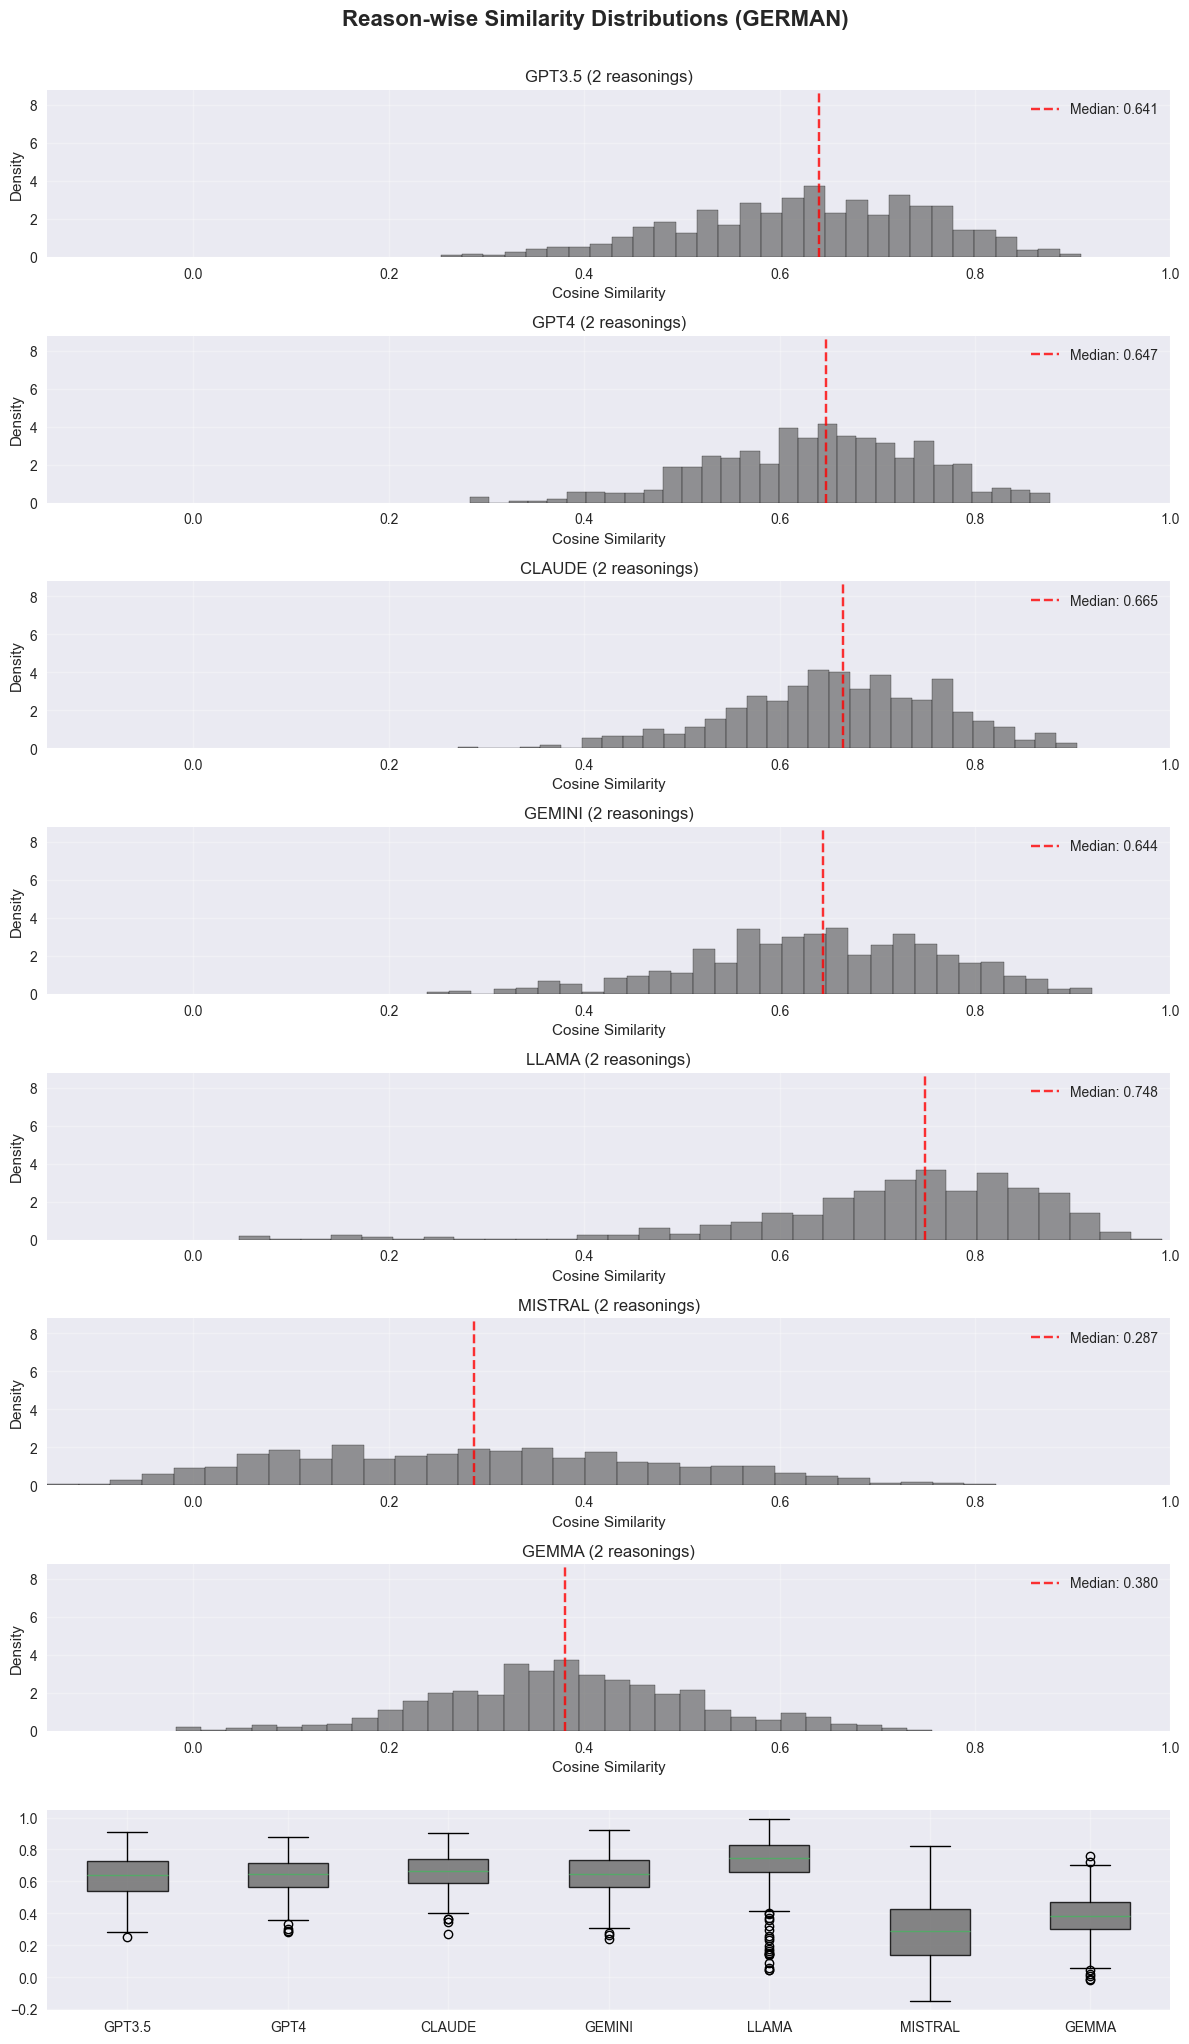

Plotting reason similarities: 100%|██████████| 7/7 [00:00<00:00, 92.76it/s]


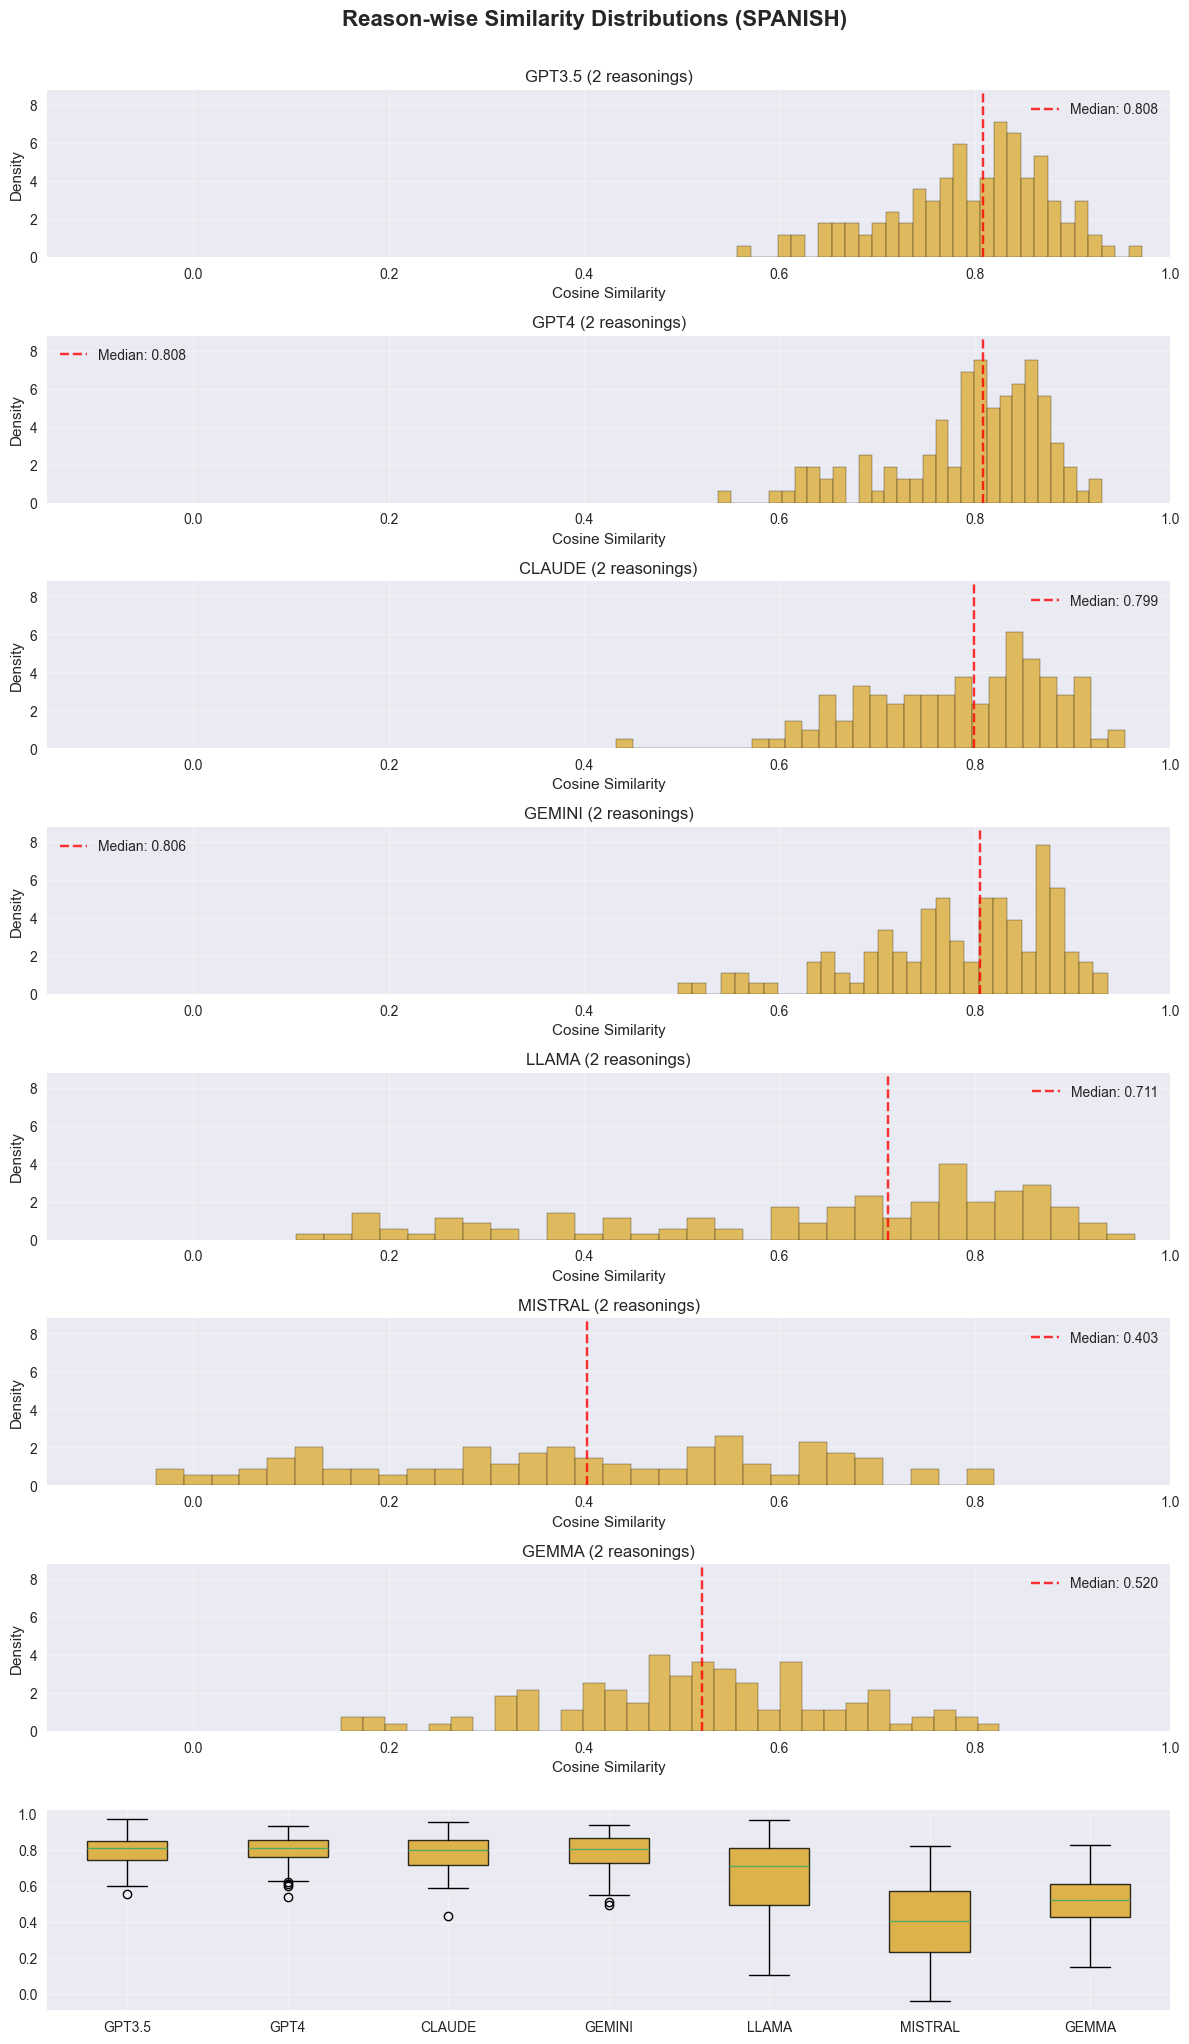

Plotting reason similarities: 100%|██████████| 7/7 [00:00<00:00, 172.48it/s]


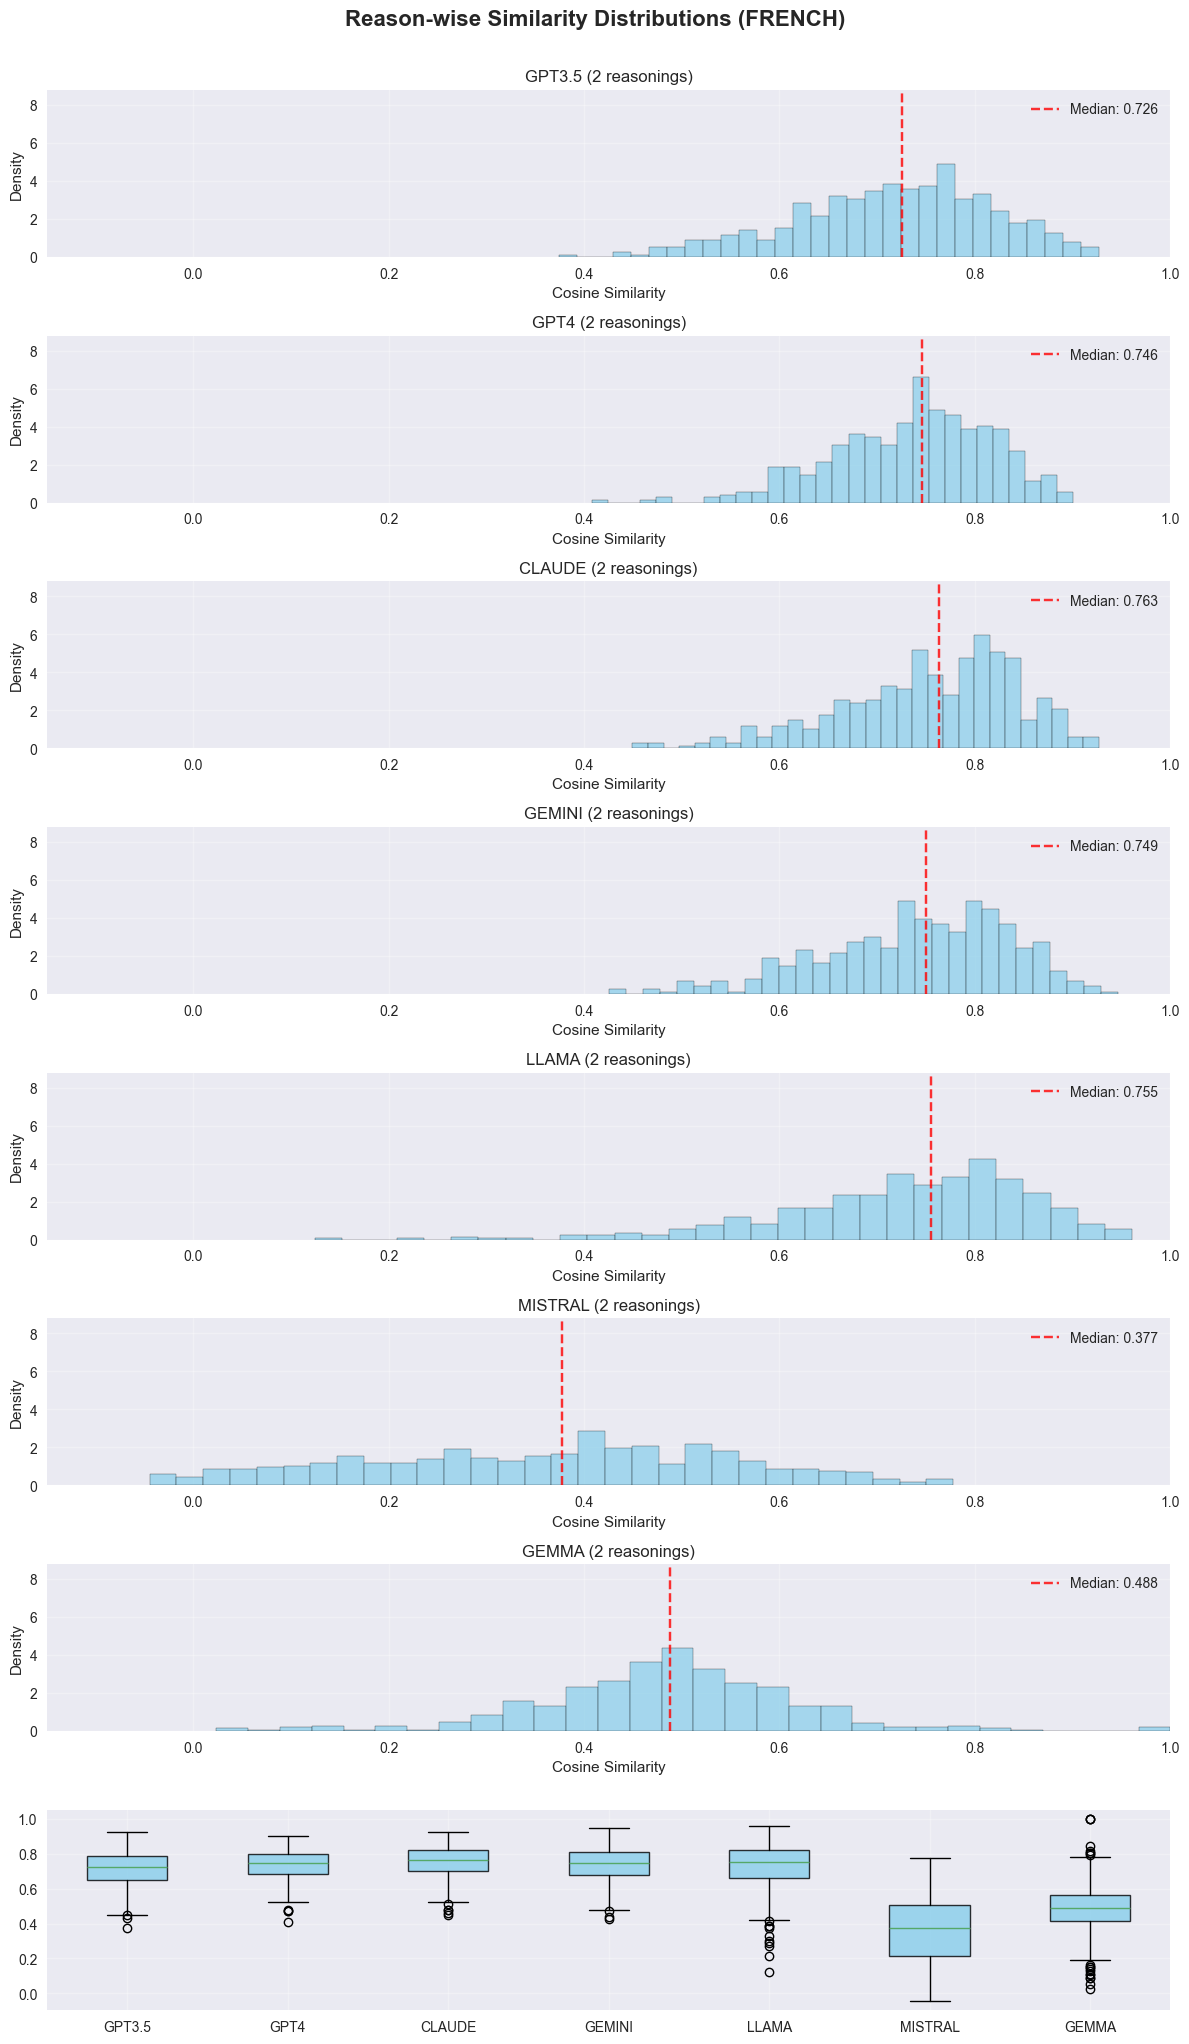

In [ ]:
# %% Visualize reason-wise similarities with standardized axis ranges (excluding human actors)

plot_reason_similarity_comparison(
    reason_similarities_base, "Base", global_reason_bounds
)
plot_reason_similarity_comparison(
    reason_similarities_br, "Portuguese", global_reason_bounds
)
plot_reason_similarity_comparison(
    reason_similarities_de, "German", global_reason_bounds
)
plot_reason_similarity_comparison(
    reason_similarities_es, "Spanish", global_reason_bounds
)
plot_reason_similarity_comparison(
    reason_similarities_fr, "French", global_reason_bounds
)

In [ ]:
# %% Statistical summary of reason-wise characteristics

reason_summary_df_base = summarize_reason_characteristics(
    reason_similarities_base, "Base"
)
reason_summary_df_br = summarize_reason_characteristics(
    reason_similarities_br, "Portuguese"
)
reason_summary_df_de = summarize_reason_characteristics(
    reason_similarities_de, "German"
)
reason_summary_df_es = summarize_reason_characteristics(
    reason_similarities_es, "Spanish"
)
reason_summary_df_fr = summarize_reason_characteristics(
    reason_similarities_fr, "French"
)


=== REASON-WISE SIMILARITY SUMMARY (BASE) ===

      Actor  Mean Similarity  Std Similarity  Min Similarity  Max Similarity  \
4     bison           0.8240          0.1101         -0.0395          1.0000   
3    claude           0.9063          0.0562          0.4829          1.0000   
7     gemma           0.7640          0.1050          0.1587          1.0000   
1    gpt3.5           0.8295          0.0965          0.2493          1.0000   
2      gpt4           0.7675          0.1134          0.1753          0.9911   
5     llama           0.8263          0.0793          0.3120          0.9956   
6   mistral           0.7294          0.1166         -0.0389          0.9755   
0  redditor           1.0000          0.0000          1.0000          1.0000   

      Q25     Q75  Num Reasons  
4  0.7641  0.9031            3  
3  0.8775  0.9459            3  
7  0.7011  0.8416            5  
1  0.7778  0.9002            3  
2  0.6998  0.8521            2  
5  0.7811  0.8841            3  


In [ ]:
# %% Save reason-wise analysis results

save_analysis_results("base", reason_summary_df_base, "reason_wise")
save_analysis_results("br", reason_summary_df_br, "reason_wise")
save_analysis_results("de", reason_summary_df_de, "reason_wise")
save_analysis_results("es", reason_summary_df_es, "reason_wise")
save_analysis_results("fr", reason_summary_df_fr, "reason_wise")

In [ ]:
# %% Cross-analysis: Intra-Actor similarity vs. inter-Actor similarity

cross_analysis_df_base = cross_analyze_actor_similarity(
    row_similarities_base,
    column_similarities_base,
    reason_similarities_base,
)
cross_analysis_df_br = cross_analyze_actor_similarity(
    row_similarities_br,
    column_similarities_br,
    reason_similarities_br,
)
cross_analysis_df_de = cross_analyze_actor_similarity(
    row_similarities_de,
    column_similarities_de,
    reason_similarities_de,
)
cross_analysis_df_es = cross_analyze_actor_similarity(
    row_similarities_es,
    column_similarities_es,
    reason_similarities_es,
)
cross_analysis_df_fr = cross_analyze_actor_similarity(
    row_similarities_fr,
    column_similarities_fr,
    reason_similarities_fr,
)

In [ ]:
# %% Save cross-analysis results

save_analysis_results("base", cross_analysis_df_base, "cross")
save_analysis_results("br", cross_analysis_df_br, "cross")
save_analysis_results("de", cross_analysis_df_de, "cross")
save_analysis_results("es", cross_analysis_df_es, "cross")
save_analysis_results("fr", cross_analysis_df_fr, "cross")

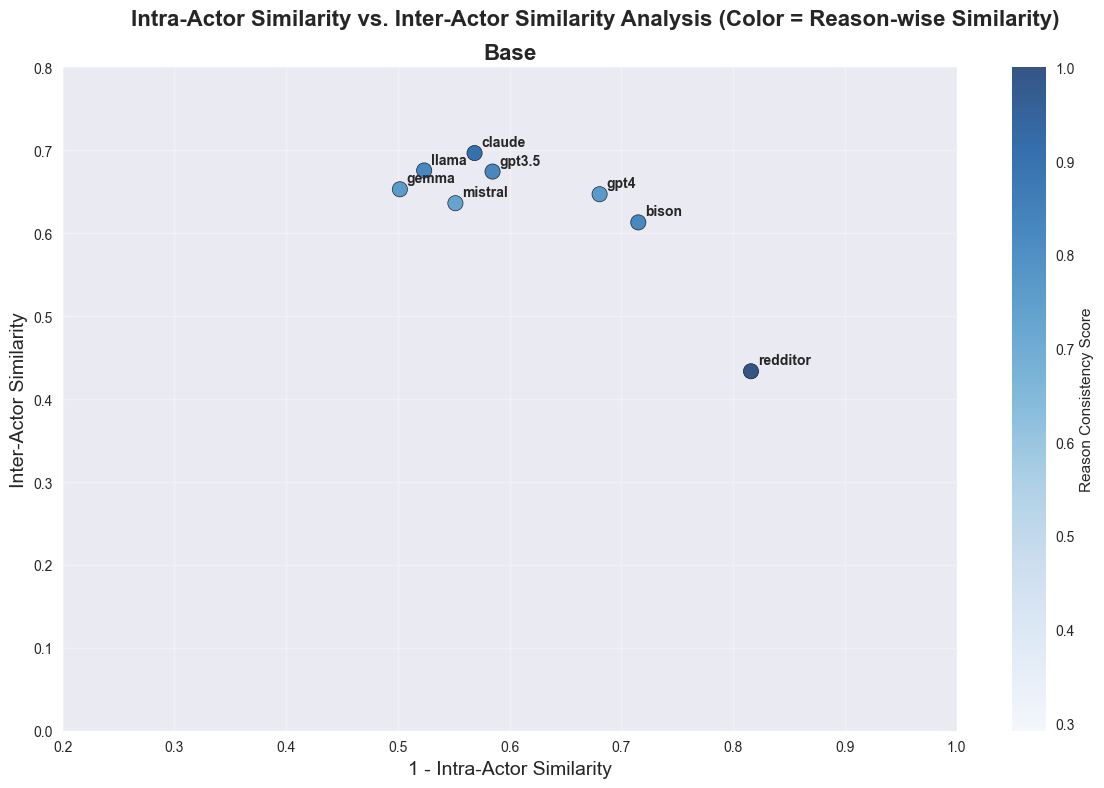

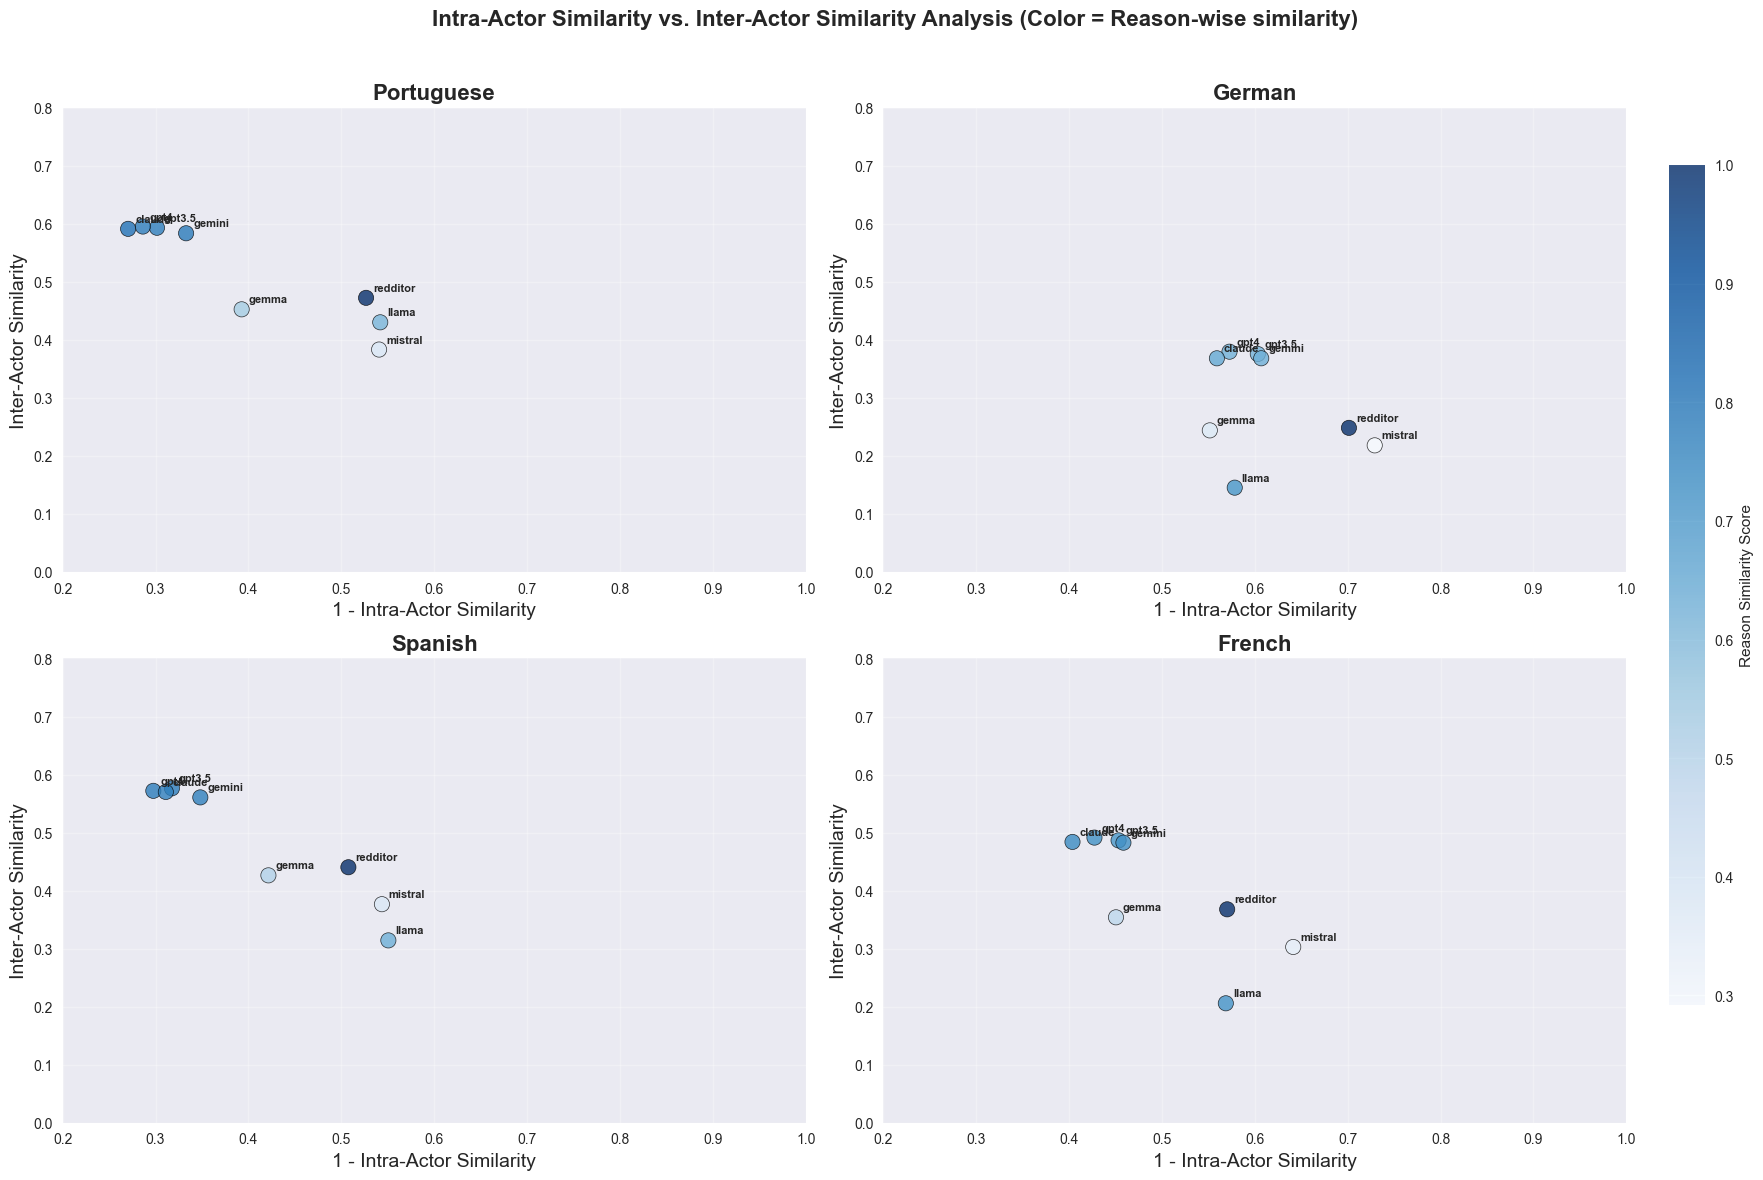

(<Figure size 1200x800 with 2 Axes>, <Figure size 1800x1200 with 5 Axes>)

In [ ]:
# %% Multi-language cross-analysis visualization

all_similarities_data = {
    "Base": {
        "row_similarities": row_similarities_base,
        "column_similarities": column_similarities_base,
        "reason_similarities": reason_similarities_base,
    },
    "Portuguese": {
        "row_similarities": row_similarities_br,
        "column_similarities": column_similarities_br,
        "reason_similarities": reason_similarities_br,
    },
    "German": {
        "row_similarities": row_similarities_de,
        "column_similarities": column_similarities_de,
        "reason_similarities": reason_similarities_de,
    },
    "Spanish": {
        "row_similarities": row_similarities_es,
        "column_similarities": column_similarities_es,
        "reason_similarities": reason_similarities_es,
    },
    "French": {
        "row_similarities": row_similarities_fr,
        "column_similarities": column_similarities_fr,
        "reason_similarities": reason_similarities_fr,
    },
}

language_codes = ["Base", "Portuguese", "German", "Spanish", "French"]
cross_analyze_multiple_languages(all_similarities_data, language_codes)

# %% [markdown]

 ## Summary of Findings

 This analysis examines embedding similarities across all available reasoning types for 7 LLM actors and human responses on moral scenarios across five datasets: English (Base), Portuguese, German, Spanish, and French.

 ### Key Findings:

 #### 1. Inter-Actor Agreement (LLM-to-LLM Similarity)

 **By Language:**
 - **Base**: Highest consensus (69.4% mean, range: 59.1% - 79.6%)
 - **Portuguese**: High consensus (52.6% mean, range: 31.9% - 74.2%)
 - **Spanish**: Moderate-high consensus (49.3% mean, range: 25.3% - 74.9%)
 - **French**: Moderate consensus (40.7% mean, range: 12.4% - 66.1%)
 - **German**: Lowest consensus (30.8% mean, range: 9.5% - 56.0%)

 **By Model (Average Across Languages):**
 - **GPT-3.5 ↔ GPT-4**: Highest agreement (~55-80% across all languages) - most aligned reasoning
 - **Claude ↔ GPT-4**: Strong agreement (~45-70%) - similar moral frameworks
 - **Bison ↔ Claude**: Strong agreement in English (66.9%) - compatible reasoning
 - **Gemini ↔ GPT models**: Moderate agreement (~40-50%) - compatible reasoning
 - **Llama ↔ Others**: Low-moderate agreement (~15-60%) - more aligned in English base
 - **Mistral ↔ Others**: Variable agreement (~20-60%) - context-dependent alignment
 - **Gemma ↔ Others**: Low-moderate agreement (~25-62%) - distinctive reasoning patterns

 #### 2. Human-LLM Alignment

 **By Language:**
 - **Portuguese**: Highest human alignment (47.2% mean, range: 35.5% - 54.3%)
 - **Spanish**: Strong human alignment (44.0% mean, range: 20.4% - 52.8%)
 - **English (Base)**: Moderate human alignment (43.4% mean, range: 40.1% - 46.9%)
 - **French**: Moderate human alignment (36.8% mean, range: 8.2% - 46.8%)
 - **German**: Lowest human alignment (24.8% mean, range: 3.7% - 31.7%)

 **By Model (Across Languages):**
 - **Claude**: Most human-like (31-54% range) - best human alignment across all languages
 - **Bison**: Strong human similarity in English (46.9%) - excellent human alignment in base dataset
 - **GPT-3.5**: Strong human similarity (32-53% range) - consistent human alignment
 - **GPT-4**: Good human similarity (30-50% range) - reliable human-like reasoning
 - **Gemini**: Moderate human similarity (25-48% range) - balanced human alignment
 - **Gemma**: Variable human similarity (20-42% range) - language-dependent alignment
 - **Mistral**: Low-moderate human similarity (15-45% range) - inconsistent human alignment
 - **Llama**: Variable human similarity (4-46% range) - best in English, worst in German

 #### 3. Intra-Actor Agreement (Consistency Across Scenarios)

 **By Language:**
 - **Portuguese**: Highest consistency (45.8% - 73.0% range across actors)
 - **Spanish**: Strong consistency (44.9% - 70.2% range)
 - **French**: Moderate consistency (35.9% - 59.6% range)
 - **German**: Lowest consistency (27.1% - 44.8% range)
 - **English (Base)**: Highly variable (18.4% - 49.8% range) - more diverse than multilingual datasets

 **By Model (Average Across Languages):**
 - **Claude**: Highest consistency (43.1% EN, 73.0% PT, 68.9% ES, 59.6% FR, 44.1% DE) - most predictable
 - **GPT-4**: High consistency (31.9% EN, 71.4% PT, 70.2% ES, 57.3% FR, 42.7% DE) - highly reliable in Romance languages
 - **GPT-3.5**: High consistency (41.5% EN, 69.8% PT, 68.2% ES, 54.7% FR, 39.7% DE) - very dependable
 - **Gemini**: Moderate-high consistency (66.7% PT, 65.2% ES, 54.1% FR, 39.3% DE) - fairly stable
 - **Bison**: Low-moderate consistency (28.5% EN) - more variable in base dataset
 - **Gemma**: Variable consistency (49.8% EN, 60.7% PT, 57.9% ES, 54.9% FR, 44.8% DE) - reasonably stable
 - **Llama**: Moderate consistency (47.6% EN, 45.8% PT, 44.9% ES, 43.1% FR, 42.2% DE) - most consistent in English
 - **Mistral**: Variable consistency (44.9% EN, 45.9% PT, 45.6% ES, 35.9% FR, 27.1% DE) - context-dependent
 - **Human**: Lowest consistency (18.4% EN, 47.3% PT, 49.2% ES, 43.0% FR, 29.9% DE) - highest variability in English

 #### 4. Reason-wise Consistency (Reasoning Coherence)

 **By Language:**
 - **English (Base)**: Highest reasoning consistency (72.9% - 90.6% range) - most coherent reasoning
 - **Portuguese**: High reasoning consistency (39.5% - 82.0% range)
 - **Spanish**: Strong reasoning consistency (39.6% - 79.5% range)
 - **French**: Moderate reasoning consistency (35.7% - 75.3% range)
 - **German**: Variable reasoning consistency (29.2% - 72.2% range)

 **By Model (Average Across Languages):**
 - **Human**: Perfect consistency (100% all languages) - single reasoning approach per scenario
 - **Claude**: Highest LLM consistency (90.6% EN, 82.0% PT, 78.4% ES, 75.3% FR, 66.0% DE) - most coherent across all languages
 - **GPT-3.5**: Very high consistency (83.0% EN, 78.8% PT, 79.5% ES, 71.6% FR, 62.9% DE) - stable reasoning
 - **Llama**: High consistency (82.6% EN, 62.0% PT, 63.9% ES, 73.0% FR, 72.2% DE) - most consistent in English/Germanic
 - **Bison**: High consistency (82.4% EN) - excellent coherence in base dataset
 - **GPT-4**: High consistency (76.7% EN, 79.0% PT, 79.5% ES, 73.5% FR, 63.8% DE) - reliable reasoning
 - **Gemini**: High consistency (79.7% PT, 78.3% ES, 74.0% FR, 64.0% DE) - very coherent
 - **Gemma**: Moderate-high consistency (76.4% EN, 54.0% PT, 51.5% ES, 48.6% FR, 38.3% DE) - best in English
 - **Mistral**: Moderate consistency (72.9% EN, 39.5% PT, 39.6% ES, 35.7% FR, 29.2% DE) - much better in English

 #### 5. Three-Dimensional Actor Profiles

 **English Base (Highest LLM Consensus):**
 - **Claude**: 57% diversity, 52% inter-similarity, 91% reason-consistency - excellent across all metrics
 - **GPT-3.5**: 58% diversity, 50% inter-similarity, 83% reason-consistency - highly reliable
 - **Llama**: 52% diversity, 49% inter-similarity, 83% reason-consistency - best performance in English
 - **Mistral**: 55% diversity, 48% inter-similarity, 73% reason-consistency - much stronger in English
 - **Gemma**: 50% diversity, 47% inter-similarity, 76% reason-consistency - solid in English
 - **GPT-4**: 68% diversity, 46% inter-similarity, 77% reason-consistency - good performer
 - **Bison**: 72% diversity, 44% inter-similarity, 82% reason-consistency - unique perspectives
 - **Human**: 82% diversity, 43% inter-similarity, 100% reason-consistency - highest variability

 **Portuguese (Best Overall Performance):**
 - **Claude**: 27% diversity, 59% inter-similarity, 82% reason-consistency - balanced excellence
 - **GPT-4**: 29% diversity, 60% inter-similarity, 79% reason-consistency - highly reliable
 - **GPT-3.5**: 30% diversity, 59% inter-similarity, 79% reason-consistency - dependable
 - **Gemini**: 33% diversity, 58% inter-similarity, 80% reason-consistency - strong performer
 - **Human**: 53% diversity, 47% inter-similarity, 100% reason-consistency - balanced variability
 - **Gemma**: 39% diversity, 45% inter-similarity, 54% reason-consistency - moderate performer
 - **Llama**: 54% diversity, 43% inter-similarity, 62% reason-consistency - diverse perspectives
 - **Mistral**: 54% diversity, 38% inter-similarity, 40% reason-consistency - most variable

 **German (Most Challenging Language):**
 - **Claude**: 56% diversity, 37% inter-similarity, 66% reason-consistency - best in German
 - **GPT-4**: 57% diversity, 38% inter-similarity, 64% reason-consistency - reliable in German
 - **GPT-3.5**: 60% diversity, 38% inter-similarity, 63% reason-consistency - stable in German
 - **Gemini**: 61% diversity, 37% inter-similarity, 64% reason-consistency - consistent performer
 - **Gemma**: 55% diversity, 24% inter-similarity, 38% reason-consistency - struggles in German
 - **Llama**: 58% diversity, 15% inter-similarity, 72% reason-consistency - unique but coherent
 - **Human**: 70% diversity, 25% inter-similarity, 100% reason-consistency - high variability
 - **Mistral**: 73% diversity, 22% inter-similarity, 29% reason-consistency - most challenging

 **Spanish (Balanced Performance):**
 - Similar patterns to Portuguese but slightly lower overall scores
 - All models maintain strong performance with good human alignment

 **French (Intermediate Performance):**
 - Moderate performance across all metrics
 - Models show intermediate consistency and alignment

 ### Practical Implications:

 **Model-Specific Recommendations:**
 - **Most Reliable Overall**: Claude (highest consistency across all 5 datasets)
 - **Most Human-Like**: Claude and Bison (best human alignment, Claude in all languages, Bison in English)
 - **Most Context-Sensitive**: Mistral (high variability, works better in English)
 - **Bison vs Gemini**: Bison shows strong reasoning coherence (82.4%) but lower consistency (28.5%); Gemini shows better consistency across scenarios

 **Cross-Language Insights:**
 - **English Advantage**: Base dataset shows 30-125% higher LLM consensus than multilingual datasets
 - **Cultural Context Matters**: Romance languages show 50-70% higher consensus than Germanic
 - **Linguistic Complexity**: German shows lowest performance across all metrics
 - **Model Performance Gap**: 20-40 percentage point difference between English and German
 - **Human Alignment Varies**: 2x higher human-LLM similarity in Portuguese vs German
 - **Reasoning Coherence**: English base shows highest reasoning consistency across all models
 - **Translation Effects**: Multilingual datasets show lower consensus, suggesting translation impacts reasoning patterns
 - **Llama's Strength**: Shows best performance in English (47.6% consistency) but drops significantly in translations